## Final Project: Customer Segmentation for Online Retail Store
### ITM-370: Data Analytics
### Lecturer: HAS Sothea, PhD
### Group 8: OUL Kimhak, KEAN Youhorng, KHUN Pungmonyratanak

<img src="https://www.bounteous.com/sites/default/files/insights/2022-10/previews/screen_shot_2022-09-01_at_12.34.57_pm.png" width="2400">

### Introduction

In today's highly competitive online retail landscape, businesses face significant challenges when it comes to effective marketing and customer engagement. One of the primary difficulties is understanding and targeting the right customer segments. Online retailers often struggle to identify distinct customer groups within their diverse audience, leading to generalized marketing efforts that lack personalization and fail to maximize sales potential. Without proper customer segmentation, retailers miss valuable opportunities to tailor their strategies to the specific needs and preferences of different buyer personas.

A key obstacle is the reliance on transactional data that typically focuses on purchases, rather than providing insights into individual customer behaviors, preferences, and motivations. This type of data, while useful, doesn't offer a complete picture of the customer journey, which is essential for driving personalized marketing strategies and improving sales.

This is where customer segmentation comes in. By transforming transactional data into customer-centric insights, retailers can gain a deeper understanding of their audience, identifying patterns in purchasing behavior, preferences, and potential needs. This shift from transaction-focused to behavior-driven data enables businesses to create targeted marketing campaigns, optimize product recommendations, and build stronger customer relationships. Ultimately, customer segmentation allows online retailers to unlock the full potential of their customer base, increase engagement, and drive more effective sales strategies

### Objectives 

The primary objective of this project is to leverage transactional data to optimize marketing strategies and increase sales. By transforming raw transactional data into a customer-centric dataset and utilizing advanced clustering techniques like K-means, we aim to segment customers into distinct groups. This segmentation will provide deeper insights into customer profiles and preferences, enabling targeted and effective marketing approaches.

**Customer Segmentation:**

- Analyze transactional data to identify behavioral patterns and purchasing trends.
- Use K-means clustering to group customers into distinct segments based on shared characteristics, such as purchase frequency, average transaction value, product preferences, and recency of purchases.
- Develop interpretable profiles for each customer segment, such as “high-value frequent buyers” or “occasional bargain hunters,” to enable focused marketing strategies.

**Feature Engineering:**

- Generate new features that capture customer behaviors to aadd on to the analysis that enables more information and insights into building the segmentation model
- Transform raw transactional data into a structured, enriched dataset suitable for clustering by normalizing and standardizing key variables.

**Recommendation System:**

- Leverage segmentation results to design a recommendation engine tailored to each customer group.
- Identify top-selling or frequently purchased products within each segment and recommend them to customers who have not yet purchased these items.

**Sales and Marketing Efficiency:**

- Create personalized marketing campaigns for each customer segment, such as targeted email promotions, product bundles, or loyalty rewards.
- Use segmentation insights to allocate resources more effectively, focusing efforts on high-value segments with significant growth potential.
- Monitor the impact of targeted marketing on customer retention, average basket size, and overall sales growth.

**Data-Driven Decision-Making:**

- Provide actionable insights to the business team, such as identifying which customer groups are most responsive to discounts or promotional campaigns.
- Provide products recommendation to customers to increase sales for the sellers after segmenting them into distinct groups.

### Project Implementation Steps

This project aims to accurately identify trends, patterns, and customer behaviors to build an effective model for segmenting customers into distinct groups. This segmentation will enable data-driven decisions to enhance sales and product offerings. To achieve these goals, we will implement the essential steps of this customer segmentation and product recommendation project.

**1. Data Understanding and Exploration** <br>
**2. Data Cleaning and Transformation**  <br>
**3. Feature Engineering** <br>
**4. Outlier Detection and Treatment** <br>
**5. Data Visualization** <br>
**6. Correlation Analysis** <br>
**7. Feature Scaling** <br>
**8. Dimensionality Reduction** <br>
**9. Model Developmeng: K-Means Clustering** <br>
**10. Clustering Model Evaluation** <br>
**11. Clustering Analysis and Profiling** <br>
**12. Product Recommendation System** <br>

### Importing Necessary Libraries

Before starting the project, we are going to import the essential libraries that we need in order to perform the implementation steps above such as data manipulation, data visualization, model development. 

In [138]:
# Data Manipulation and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
import matplotlib.gridspec as gridspec
from scipy.stats import linregress
import missingno as msno

# Model Development 
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

from tabulate import tabulate
from collections import Counter

# Magic function 
%matplotlib inline

In [139]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

### Loading the Dataset

In this project, we are using the dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail) which is a transactional data that contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

| __Variables__   | __Description__ |
|     :---       |       :---      |      
| __InvoiceNo__  | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. |
| __StockCode__  | A 5-digit integral number uniquely assigned to each distinct product. |
| __Description__| Description of each product. |
| __Quantity__   | The number of units of a product in a transaction. |
| __InvoiceDate__| The date and time of the transaction. |
| __UnitPrice__  | The unit price of the product in sterling. |
| __CustomerID__ | Identifier uniquely assigned to each customer. |
| __Country__    | The country of the customer. |

In [140]:
# Loading the dataset into dataframe
df = pd.read_excel('Online Retail.xlsx')

# List the top five rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 1. Data Understanding and Exploration

First, we perform an initial analysis on the dataset to understand the structures and data types.

In [141]:
# Dataset shapes and columns 
print(f"The shape of the dataset: {df.shape}")
print(f"The list of columns of the dataset: \n {list(df.columns)}")

The shape of the dataset: (541909, 8)
The list of columns of the dataset: 
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [142]:
# Finding the number of quantitative and qualitative variables
quan_vars = df.select_dtypes(exclude='object').shape[1]
qual_vars = df.select_dtypes(include='object').shape[1]

print(f"The number of quantitative Variables of the dataset: {quan_vars}")
print(list(df.select_dtypes(exclude='object').columns))
print()
print(f"The number of quantitative Variables of the dataset: {qual_vars}")
print(list(df.select_dtypes(include='object').columns))

The number of quantitative Variables of the dataset: 4
['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID']

The number of quantitative Variables of the dataset: 4
['InvoiceNo', 'StockCode', 'Description', 'Country']


In [143]:
# Getting an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Check for missing and duplicated rows**

In [144]:
# Find the total number of missing values
pd.DataFrame(df.isnull().sum() / len(df) * 100, columns=['Percentage'])

,Percentage
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


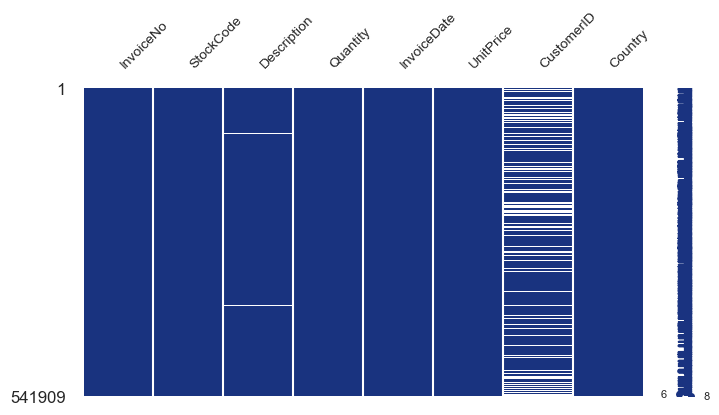

In [145]:
# Plotting missing values distribution
msno.matrix(df, figsize=(8,4), fontsize=10, color=(0.1, 0.2, 0.5))

plt.show()

In [146]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 5 records
duplicate_rows_sorted.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom


**Inferences:** the dataset consists of 541909 entries with a total number columns of 8. From a quick look on the top five rows of the dataframe, we can see that each transaction consists of multiple rows that consist of different product code with different quantities but with the same invoice number and customer id, indicating that even though the number of entries in the datafram are large, the number of unique transaction are lower than that. <br>

- **InvoiceNo**: This is an object type column that contains the invoice number of each transaction. One invoice number can be in multiple rows with different type of products.
- **StockCode**: This is an object type column also that contains the unique number of each product in the stock.
- **Description**: This is also an object type column that represents the description of each item, and it has some missing values about 500 entries.
- **Quantity**: This is an integer type column that contains the number of item within the unique stock code purchased in each transaction.
- **InvoiceDate**: This is datetime column that represents the date and time of the transaction of each customer. 
- **UnitPrice**: This is a float column that contains the unit price of each item.
- **CustomerID**: This is also a float column that represents the unique customers of each transaction. One customer can have multiple transaction and invoice number.
- **Country**: This is an object type column that represnets the country where the transaction took place. <br>

There are two columns with missing values which are **Description** and **CustomerID**. We can see that the number of missing values for **CustomerID** are large which is about 14000 missing entries. For data type, the **InvoiceDate** column is already in a correct datetime type. Additionally, there are also certain rows with duplication too, indicating error that needs to be addressed as it leads to noise and inaccuracy. So, in the next step, we are going to perform data cleaning and transformation more in deep in order to prepare the data ready for model development. 

Before moving to the data cleaning part, we can do summary statistics on the dataset to gain some patterns. 

In [147]:
# Using describe for statistical summary on numemrical columns 
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


Now we see some interesting number in the minimum value for **Quantity** and **UnitPrice** columns as it shows negative number for the minimun values. However, we know that there are some cancellation transactions in which the **InvoiceNo** starts with the letter 'C', so let's take a closer look into this.

In [148]:
# We want to know how many rows with negative Quantity with Cancelled Invoiced 
print("Number of rows with Negative Quantity and Cancelled Invoiced: ", 
      df[(df['Quantity'] < 0) & (df['InvoiceNo'].str.startswith('C'))].shape[0])

# We also waat to know how many rows with negative Quantity, Cancelled Invoiced Individually
print("Number of rows with Negative Quantity: ", df[df['Quantity'] < 0].shape[0]) 
print("Number of rows with Cancelled Invoiced", df[df['InvoiceNo'].notna() & df['InvoiceNo'].str.startswith('C')].shape[0]) 

Number of rows with Negative Quantity and Cancelled Invoiced:  9288
Number of rows with Negative Quantity:  10624
Number of rows with Cancelled Invoiced 9288


In [149]:
# Find negative Quantity without Cancelled Invoiced 
df[(df['Quantity'] < 0) & (~df['InvoiceNo'].astype(str).str.startswith('C'))].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom


In [150]:
# Find entries with negative UnitPrice
df[(df['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


**Observations**: <br>

Now we can see that all of the Cancelled Invoiced have a negative quantity which is logically true as the transaction is already cancelled. Moreover, for the negative entries of quantity without cancelled invoiced, there are entry error from the beginning as we can see that there is no CustomerID and Description.

In [151]:
# Using describe for statistical summary on object columns
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


**Inferences:** after performing statistical summary on the numerical and object columns types, we come with observation of the following <br>

- **Quantity**: The average quantity of the product is about 9.55. We can also see a large standard deviation which means the quantity is really spread out from the 3rd quartile. There are also negative qauntity too, which are the cancelled invoiced.
- **UnitPrice**: The average price of item is around 4.61 with also a high spread out range from the 3rd quartile, indicating outliers that must be treated. There are also negative unit price, indicating error and noises.
- **CustomerID**: There are 406829 non-null entries, indicating missing values in the dataset which need to be addressed. The Customer IDs range from 12346 to 18287, helping in identifying unique customers.
- **InvoiceNo**: There are 25900 unique invoice numbers, indicating 25900 separate transactions. The most frequent invoice number is 573585, appearing 1114 times, possibly representing a large transaction or an order with multiple items.
- **StockCode**: There are 4070 unique stock codes representing different products. The most frequent stock code is 85123A, appearing 2313 times in the dataset.
- **InvoiceDate**: The transactional data was from 2010-12 to 2011-12
- **Description**: There are 4223 unique product descriptions. The most frequent product description is "WHITE HANGING HEART T-LIGHT HOLDER", appearing 2369 times. There are some missing values in this column which need to be treated.
- **Country**:The transactions come from 38 different countries, with a dominant majority of the transactions (approximately 91.4%) originating from the United Kingdom.

### 2. Data Cleaning & Transformation

In this step, we are going to perform in-depth cleaning of the dataset such as handling missing values, dropping duplicated entries, and correcting anomoly in product description and code. This is the important step before going to another step as we need to prepare the data to be ready for analysis and model development. 

**Handling Missing Values** <br>

Let's create a visualization to show the percentage of the missing values of the columns.

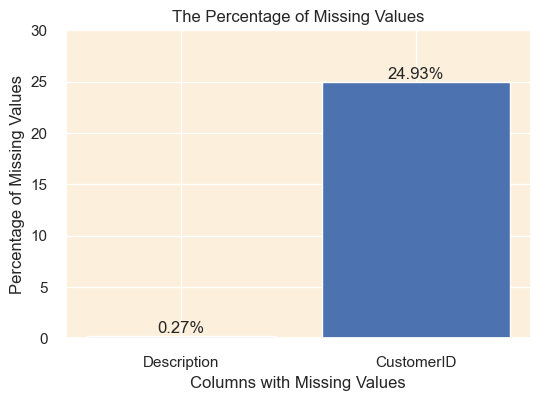

In [152]:
# Find the missing percentage of the columns
missing_values = df.isnull().sum()
missing_percentage = missing_values[missing_values > 0] / len(df) * 100

# Sort the missing percentage
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(missing_percentage.index, missing_percentage)

# Add title and label
plt.xlabel('Columns with Missing Values')
plt.ylabel('Percentage of Missing Values')
plt.title('The Percentage of Missing Values')
plt.ylim([0, 30])

# Add label on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

**Observations**: after performing a visualization on the missing values, we now have a clear view of the two columns with missing values which are **CustomerID** and **Description**. <br>

- **CustomerID**: this column contains a unique code that identifies each customer which is an important feature that we can use to do clustering and recommendation as we need the unique ID to know the customers. Moreover, the missing value percentage for this column is nearly a quarter which is really huge, so to ensure that the data is clean and well-prepared for further analysis, we can just drop the rows with this missing values instead of imputing as it may lead to error.
- **Description**: we can see that there is only a small amount of missing values for this column, however, it has been seen that there are inconsistencies in the data where the same **StockCode** does not always have the same description. So, to ensure the integrity and consistency of the data, we can drop rows with this column missing values.

In [153]:
# Drop rows with CustomerID and Description as null
df = df.dropna(subset=['CustomerID', 'Description'])

# Verifying the missing values whether they have been deleted
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

There is no more missing values in the column of the dataset. 

**Handling Duplicated Values** <br>

The prviouse exploration showed that there are identical rows with duplicated values in the dataset. So, let's check again to find the identical rows.

In [154]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom


**Observations**: in the context of the original dataset, these idential rows might be due to human errors when recording the data. These duplicated rows might generate noise and potential inaccuracies during model development. So, the best approach that we can do is to drop these rows to make the dataset cleaner and be better prepared for further steps.

In [155]:
# Drop rows with duplicated values
df = df.drop_duplicates()

In [156]:
# Print the shape of the dataset again after removing null and duplicatef rows
print(df.shape)

(401604, 8)


**Handling Cancelled Transactions** <br>

We know that there are around 9000 rows with cancelled transaction with negative quantity, but these behaviours can have a strong impact on model development when used to cluster each customers into their distinct groups as this may help to understand customer behaciour and shopping pattern better.

In [157]:
# Filter out the rows with Cancelled Transactions and analyze their patterns
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the patterns of Cancelled Transactions
cancelled_tran = df[df['Transaction_Status'] == 'Cancelled']
cancelled_tran.drop(['CustomerID', 'InvoiceDate'], axis=1).describe()

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


**Inferences**: Initially we know that the Cancelled Transactions all have negative Quantity which are true because the products were not bought that is why we see negative number. As for the number of unit, we can see that 75% of them were from 0.01 to nearly 5 units, following by a high spread out. <br>

**Strategy**: The objective of the project is effectively and accurately segment customers into distinct group with the same preferences or behaviours, so it is important for us to to use Transaction Status feature to analyze and understand the patterns of the customers, which means we need to retian these cancalled transactions customers to facilitate for further analysis.

**Correcting Stock Code Anomolies**

In [158]:
# Find number of unique stock code
print(f"The number of unique StockCode: {df['StockCode'].nunique()}")

The number of unique StockCode: 3684


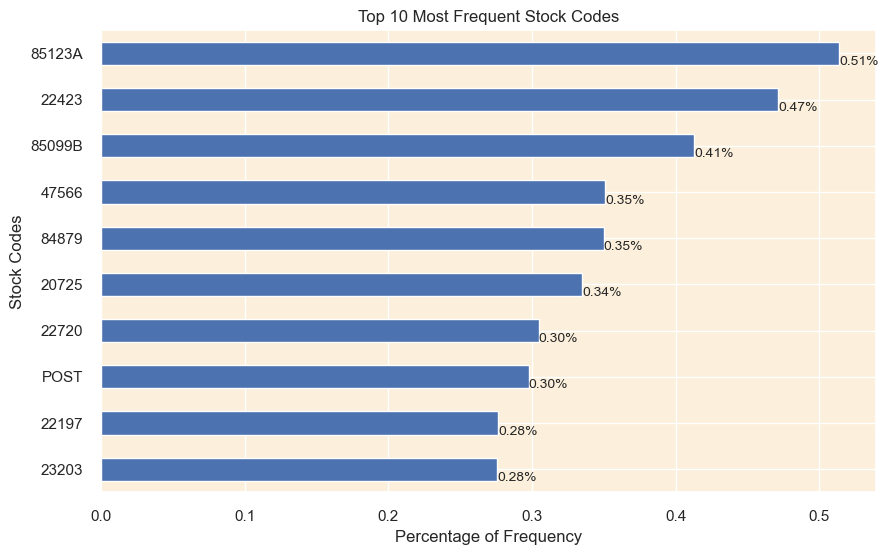

In [159]:
# Finding the top 10 most frequent stock codes
top10_stock = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(10, 6))
top10_stock.plot(kind='barh')

# Adding the percentage frequency on the bars
for index, value in enumerate(top10_stock):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage of Frequency')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

**Observations**: There are in total of 3684 unique number of stock code in the retail store. <br>

- It shows that there are a variaty of products in the store which can show patterns and preference for clustering the customers with different group of products. 
- We see one error on the top 10 most frequent stock code which is not a number but a string **"POST"**, indicating that there are anomolies within the StockCode columns as most of the code are 5 to 6 digits. We can explore this further to treat this error.

In [160]:
# Let's check for number of numerical digits in stock code to analyze the anamolies further
unique_stock_code = df['StockCode'].unique()
numeric_char = pd.Series(unique_stock_code).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character in unique stock codes:")
print()
print(numeric_char)

Value counts of numeric character in unique stock codes:

5    3676
0       7
1       1
Name: count, dtype: int64


Now we know that there are 7 stock codes without numerical digits and 1 stock code with only one numerical digits, while 3676 unique codes left have 5 numerical digits.

In [161]:
# Let's check those codes with 1 and 0 numerical digit
error_stock_code = [code for code in unique_stock_code if sum(c.isdigit() for c in str(code)) in (0,1)]

print("The unique stock code with error: ")
print()
for code in error_stock_code:
    print(code)

The unique stock code with error: 

POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [162]:
# Calcualate the percentage of records with these error stock codes
percentage = (df['StockCode'].isin(error_stock_code).sum() / len(df)) * 100

print(f"The percentage of records with error stock code: {np.round(percentage,2)}%")

The percentage of records with error stock code: 0.48%


**Observations**: Based on the analysis, there is only 0.48% of the whole records in the dataset with those error stock code, and only 8 out of 3684 of unique code. Since they do not really present the actual product and are a very small proportion of the dataset, including them in further analysis may lead to noise and inaccuracies. <br>

So, we can just drop the rows with these error stock code directly in order to ensure that the data is cleaned with the correct stock code in each transactions.

In [163]:
# Removing rows with error stock code 
df = df[~df['StockCode'].isin(error_stock_code)]

# Check shape of the current df
df.shape

(399689, 9)

**Cleaning Description Column** 

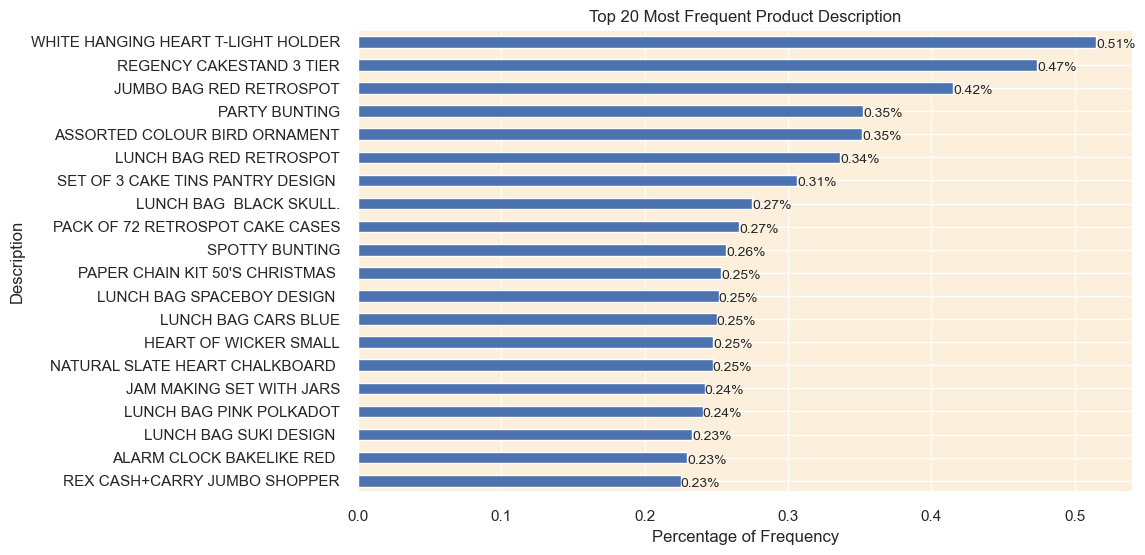

In [164]:
# Check for some of the most frequent description of the product to see patterns 
top20_desc = df['Description'].value_counts(normalize=True).head(20) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(10, 6))
top20_desc.plot(kind='barh')

# Adding the percentage frequency on the bars
for index, value in enumerate(top20_desc):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 20 Most Frequent Product Description')
plt.xlabel('Percentage of Frequency')
plt.ylabel('Description')
plt.gca().invert_yaxis()
plt.show()

**Inferences**: <br>

- Household items, particularly kitchenware, lunch bags, and decorative products, appear most frequently in the descriptions.

- Notably, all descriptions are formatted in uppercase, suggesting a potential standard for recording product details in the database. However, considering the inconsistencies and irregularities identified in the dataset, it would be sensible to check for any descriptions written in lowercase or with mixed capitalization.

In [165]:
# Find unique descriptions containing lowercase characters
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

print("The unique descriptions containing lowercase characters are:")
print()
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:

BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


**Observations**: Upon reviewing the descriptions that contain lowercase characters, it is evident that some entries are not product descriptions, such as "Next Day Carriage" and "High Resolution Image". These entries seem to be unrelated to the actual products and might represent other types of information or service details.

**Strategy**: To handle this error, we can work on two steps
- Step 1: we need to drop all the records with those two description as they do not represent the actual product itself, which do not contribute to the clustering and recommendation we aim to build
- Step 2: we can standardize the description with mixed cases so that they are uniformly on upper case.

In [166]:
# Finding the percentage of rows with error product description 
percentage = df[df['Description'].isin(['Next Day Carriage', 'High Resolution Image'])].shape[0] / df.shape[0] * 100

print(f"The pecentage of rows with error product description of 'Next Day Carriage' and 'High Resolution Image': {np.round(percentage, 2)}%")

The pecentage of rows with error product description of 'Next Day Carriage' and 'High Resolution Image': 0.02%


In [167]:
# Now let's drop the records
df = df[~df['Description'].isin(['Next Day Carriage', 'High Resolution Image'])]

# Convert the description into upper case for all values
df.loc[:, 'Description'] = df['Description'].str.upper()

**Treating Zero Unit Price**

In [168]:
# Let's check again on Unit Price patterns
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

**Inferences**: We see that the minimum value of unit price is zero. This suggests that there are some transactions where the unit price is zero, potentially indicating a free item or a data entry error. To understand their nature, it is essential to investigate these zero unit price transactions further. A detailed analysis of the product descriptions associated with zero unit prices will be conducted to determine if they adhere to a specific pattern

In [169]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,420.515152
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000
std,2176.713608


**Inferences:** <br>
- The transactions with a unit price of zero are relatively few in number (33 transactions).

- These transactions have a large variability in the quantity of items involved, ranging from 1 to 12540, with a substantial standard deviation.

- Including these transactions in the clustering analysis might introduce noise and could potentially distort the customer behavior patterns identified by the clustering algorithm

**Strategy:** Given the small number of these transactions and their potential to introduce noise in the data analysis, the strategy should be to remove these transactions from the dataset. This would help in maintaining a cleaner and more consistent dataset, which is essential for building an accurate and reliable clustering model and recommendation system.

In [170]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['UnitPrice'] > 0]

**Data Cleaning Conclusion**: Now we have successfully cleaned the dataset and prepare it for further analysis and to be ready to convert into customer-centric dataset where we can identify patterns and customer behaviour effectively and more in-depth to develop the clustering model for customer segmentation and product recommendation system. 

In [171]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

# Find number of current rows
print(f"Current number of rows in the dataset after cleaning: {df.shape[0]}")
df.head(10)

Current number of rows in the dataset after cleaning: 399573


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,Completed
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,Completed
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,Completed
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,Completed
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,Completed


### 3. Feature Engineering

In order to create a comprehensive and insightful customer-centric dataset for clustering model and recommendation system, we need to create new feature from the available transactional dataset that we have prepared so that we are able to find more patterns and behaviour into each customer.

**RFM Features**: RFM is a data-driven method used in marketing and customer relationship management to evaluate and categorize customers based on their purchasing behavior. It can be used for analyzing customer value. <br>

- **Recency(R):** This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the store.
- **Frequency(F):** This metric signifies how often customer makes a purchase within a certain period. A higher frequency value indicatees a customer who interacts with the store business more often that the lower one, suggesting higher loyalty or satisfaction.
- **Monetary(M):** This metric represents the total amount of money a customer has spent over a certain period. Customer who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.

With these three metrics together, they help in understanding a customer's buying behavior and preferences as each group of customers can have different RFM values, which is important in personalizing marketing strategies and creating a recommendation system.

**Recency(R)**: In this step, we focus on understanding how recently a customer has made a purchase. This is crucial aspect of customer segmentation as it helpts in identifying the engagement level of customers. <br>

- **Days Since Last Purchased**: This feature represents the number of days that have passed since the customer's last purchase. A lower value indicates that the customer has purchased recently, implying a higher engagement level with the store business. By understanding the recency of purchases, businesses can tailor their marketing strategies to re-engage customers who have not made purchases in a while, potentially increasing customer retenton and fostering loyalty amongst the customer.

In [172]:
# We use the InvoiceDate to create the Recency value
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract only day from the InvoiceDate
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent day of the entire dataset
most_recent_date = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since last purchases for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay Column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

We are creating new dataframe for customer-centric data which is the **customer_data**, and nows it is containing the Recency Features of the day since last purchase of each customer.

In [173]:
# Check the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


**Frequency(F):** In this step, we are going to create two features that quantify the frequency of a customer's engagement with the store. <br>

- **Total Transactions**: This feature represents the total number of transactions made by a customer. It helps in understanding the engagement level of a customer with the store.
- **Total Products Purchased**: This feature indicates the total number of products purchased by a customer across all transactions. It gives an insight into the customer's buying behavoir in terms of the volume of products purchased. <br>

These features will be important in segmenting customers based on their buying and engagement frequency.

In [174]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo':'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Combine the new features with customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products, on='CustomerID')

# Check customer_data
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2332
3,12349.0,18,1,630
4,12350.0,310,1,196


**Monetary(M):** In this step, we are going to create two features that represent the monetary aspect of customer's transactions <br>

- **Total Spend**: This feature represents the total amount of money spent by each customer. It is calculated as the sum of the product of UnitPrice and Quantity for all transactions made by a customer. This feature is important as it helpts in identifying the total revenue generated by each customer, which is a direct indicator of a customer's value to the business.
- **Average Transaction Value**: This feature is calculated as the Total Spend divided by the Total Transactions for each customer. It indicates the average value of a transaction carried out by a customer. This metric is useful in understanding the spending behavior of customer per transaction.

In [175]:
# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calcualte the average transactins value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2332,1437.24,359.310000
3,12349.0,18,1,630,1457.55,1457.550000
4,12350.0,310,1,196,294.40,294.400000


In [208]:
customer_data['Total_Spend'].describe()

count         4282.0
mean     1925.758996
std      8339.406646
min          -1192.2
25%          301.095
50%            656.0
75%         1615.315
max        278778.02
Name: Total_Spend, dtype: Float64

**Product Diversity:** In this step, we are going to understand the diversity in the product purchase behavior of customers. Understanding product diversity can help in crafting personalized marketing strategies and product recommendations.<br>

- **Uniwue Product Purchased**: This feature represents the number of distinct products bought by a customer. A higher value indicates that the customer has diverse taste or preference, buying a wide range of products, while a lower value might indicates a focused or specific preference. 

In [176]:
# Calculate the number of unique products by each customer 
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into customer_data
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2332,1437.24,359.310000,21
3,12349.0,18,1,630,1457.55,1457.550000,72
4,12350.0,310,1,196,294.40,294.400000,16


**Behavioral Features:** In this step, we aim to understand and capture the shopping patterns and behaviors of customers. These features will give us insights into the customers' preferences regarding when they like to shop, which can be crucial information for personalizing shopping experience.<br>

- **Average Days Between Purchases**: This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions.
- **Favorite Shopping Day**: This shows the day of the week when the customer shops the mose. This information can help in identifying the preferred shopping days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week.
- **Favorite Shopping Hour**: This refers to the hour of the day when the customer shops the most. Identifying the favorite shopping hour can aid in optimizing the timing of marketing campaigns and promotions with the times when different custoemr segments are most active.<br>

By including these behavioral features in our dataset, we can create a more rounded view of our customers, which will pontentially enhance the effectiveness of the clustering algorithm, leading to more meaningful customer segments.

In [177]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16


**Geographic Features**: In this step, we want to create a geographic feature that reflects the geographical location of customers. Understanding the geographivv distribution of customers is important for several reasons. <br>

- **Country**: This feature identifies the country where each customer is located. Including the country data can help us understand region-specific buying patterns and preferences. Different regions might have varying preferences and purchasing behavoirs which can be critical in personalizing marketing strategies and inventory planning. Furthermore, it can be instrumental in logistics and supply chain optimization, particularly for an online retailer where shipping and develivery play a big role.

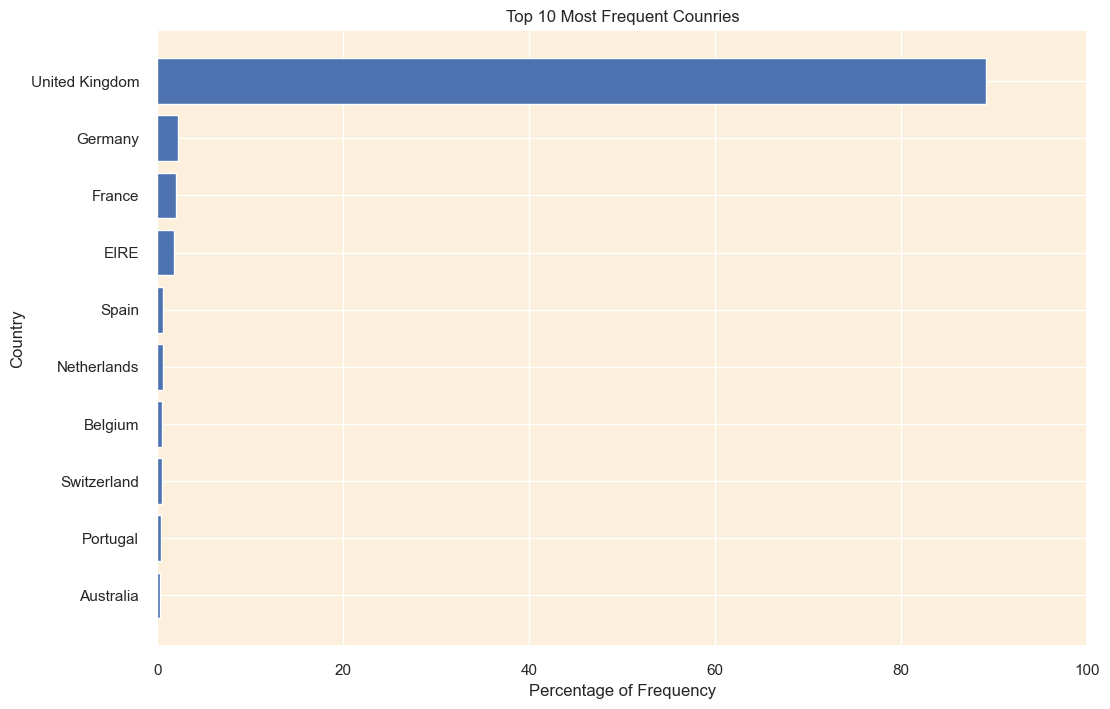

In [178]:
# Calculate the percentage of each countries
df_countries = df['Country'].value_counts().reset_index(name='Count').head(10)
df_countries['Percentage'] = df_countries['Count'] / len(df) * 100

# Plot the top 10 most frequent countries
plt.figure(figsize=(12, 8))
plt.barh(y=df_countries['Country'], width= df_countries['Percentage'])

plt.title('Top 10 Most Frequent Counries')
plt.xlabel('Percentage of Frequency')
plt.ylabel('Country')
plt.xlim(0,100)
plt.gca().invert_yaxis()
plt.show()

**Observations**: Given that a substantial portion 89% of transactions are originating from the UNITED KINGDOM, we might consider creating a binary feature indicating whether the transaction is from UK or not. This approach can potentially streamline the clustering process without losing critical geographical information, especially when considering the application of algorithms like K-means which are sensitive to the dimensionality of the feature space. <br>

**Methodology**: <br>

- First, let's group the data by CustomerID and Country and calculate the number of transactions per country for each customer
- Next, we will identify the main country for each customer - the country from which they have the maximum transactions
- Then, we will create a binary column indicating whether the customer is from the UK or not

In [179]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0


In [180]:
# Check the Is_UK distribution
customer_data['Is_UK'].value_counts()

Is_UK
1    3866
0     416
Name: count, dtype: int64

**Cancellation Insights:** In this step, we are going to delve deeper into the cancellation patterns of customers to gain insights that enhance our customer segmentation model. <br>

- **Cancellation Frequency**: This metric represents the total number of transactions a customer has cancelled. Understanding the frequency of cancelleation can help us identify customers who are more likely to cancel transactions. This could be an indicator of dissatifaction or other issues, and understanding this can help us tailor strategies to reduce cancellations and enhance customer satisfaction.
- **Cancellation Rate**: This represents the proportion of transactions that a customer has canceled out of all their transactions. This metric gives a normalized view of cancellation behavior. A high cancellation rate might be indicative of an unsatisfied customer segment. By identifying these segments, we can develop targeted strategies to improve their shopping experience and potentially reduce the cancellation rate.

By incorporating these cancellation insights into our dataset, we can build a more comprehensive view of customer behavior, which could potentially aid in creating more effective and nuanced customer segmentation.

In [181]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status']=='Cancelled']
cancellation_freq = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_freq.rename(columns={'InvoiceNo':'Cancellation_Frequency'}, inplace=True)

# Merge the features into customer_data
customer_data = pd.merge(customer_data, cancellation_freq, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0


**Seasonality & Trends:** In this step, let's analyze deeer into the seasonality and trends in customers' purchasing behaviors, which can offer invaluable insights for tailoring marketing strategies and enhancing customer satisfaction. <br>

- **Monthly Spending Mean**: This is the average amount a customer spends monthly. It helps us gauge the general spending habit of each customer. A higher mean indicates a customer who spends more, potentially showing interest in premium products, whereas a lower mean might indicate a more budget-conscious customer.
- **Monthly Spending STD**: This feature indicates the variability in a customer's monthly spending. A higher value signals that the customer's spending fluctuates significantly month-to-month, perhaps indicating sporadic large purchases. In contrast, a lower value suggests more stable, consistent spending habits. Understanding this variability can help in crafting personalized promotions or discounts during periods they are expected to spend more.
- **Spending Trend**: This reflects the trend in a customer's spending over time, calculated as the slope of the linear trend line fitted to their spending data. A positive value indicates an increasing trend in spending, possibly pointing to growing loyalty or satisfaction. Conversely, a negative trend might signal decreasing interest or satisfaction, highlighting a need for re-engagement strategies. A near-zero value signifies stable spending habits. Recognizing these trends can help in developing strategies to either maintain or alter customer spending patterns, enhancing the effectiveness of marketing campaigns.

In [182]:
# Extract month and year from the InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate trends in spending
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0
  
# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,0.000000
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0,359.310000,203.875689,-100.884000
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000,0.000000
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0,294.400000,0.000000,0.000000


In [183]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [184]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   string 
 1   Days_Since_Last_Purchase        4282 non-null   Int64  
 2   Total_Transactions              4282 non-null   Int64  
 3   Total_Products_Purchased        4282 non-null   Int64  
 4   Total_Spend                     4282 non-null   Float64
 5   Average_Transaction_Value       4282 non-null   Float64
 6   Unique_Products_Purchased       4282 non-null   Int64  
 7   Average_Days_Between_Purchases  4282 non-null   Float64
 8   Day_Of_Week                     4282 non-null   Int32  
 9   Hour                            4282 non-null   Int32  
 10  Is_UK                           4282 non-null   Int64  
 11  Cancellation_Frequency          4282 non-null   Int64  
 12  Cancellation_Rate               42

Now we have successfully created a customer-centric dataset that contains all the features that are necessary to find the patterns and behaviors within each customer as this can be used in the clustering model to group customer in their own similar segment.

| __Variable__                       | __Description__ |
|     :---                           |       :---      |
| __CustomerID__                     | Identifier uniquely assigned to each customer, used to distinguish individual customers. |
| __Days_Since_Last_Purchase__       | The number of days that have passed since the customer's last purchase. |
| __Total_Transactions__             | The total number of transactions made by the customer. |
| __Total_Products_Purchased__       | The total quantity of products purchased by the customer across all transactions. |
| __Total_Spend__                    | The total amount of money the customer has spent across all transactions. |
| __Average_Transaction_Value__      | The average value of the customer's transactions, calculated as total spend divided by the number of transactions. |
| __Unique_Products_Purchased__      | The number of different products the customer has purchased. |
| __Average_Days_Between_Purchases__ | The average number of days between consecutive purchases made by the customer. |
| __Day_Of_Week__                    | The day of the week when the customer prefers to shop, represented numerically (0 for Monday, 6 for Sunday). |
| __Hour__                           | The hour of the day when the customer prefers to shop, represented in a 24-hour format. |
| __Is_UK__                          | A binary variable indicating whether the customer is based in the UK (1) or not (0). |
| __Cancellation_Frequency__         | The total number of transactions that the customer has cancelled. |
| __Cancellation_Rate__              | The proportion of transactions that the customer has cancelled, calculated as cancellation frequency divided by total transactions. |
| __Monthly_Spending_Mean__          | The average monthly spending of the customer. |
| __Monthly_Spending_Std__           | The standard deviation of the customer's monthly spending, indicating the variability in their spending pattern. |
| __Spending_Trend__                 | A numerical representation of the trend in the customer's spending over time. A positive value indicates an increasing trend, a negative value indicates a decreasing trend, and a value close to zero indicates a stable trend. |


### 4. Outlier Detection and Treatment

In this step, we are going to delve deeper into identifying and handling outliers in our dataset. Outliers are data points tha are significantly different from the majority of other points in the dataset. These points can potentially skew the results of our analysis, especially in K-Means clustering where they can significantly influence the position of the cluster centroids. Therefore, it is essential to identify and treat these outliers appropriately to achieve more accurate and meaningful clustering results. <br>

Given the multi-dimensional nature of the data, it would be good to use algorithms that can detect outliers in multi-dimensional spaces. We are going to use **Isolation Forest** algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolatees observations by randomly selecting a feature and a split value between the maximum and minimum values of the selected feature.

In [185]:
# Initializing the IsolationForest model
model = IsolationForest(contamination=0.05, random_state=0) # Contamination: expected outlier percentage

# Fitting the model on our dataset 
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers
customer_data['Is_Outliers'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outliers
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1,0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,1,0
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,1,0
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,1,0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,1,0


After applying the **Isolation Forest Algorithm**, we have identified the outliers and marked them in a new column Is_Outliers. We have also calcualted the outlier scores to represent the anomoly score of each record. <br>

- **1 score** : Normal data point
- **-1 score**: Outliers data point

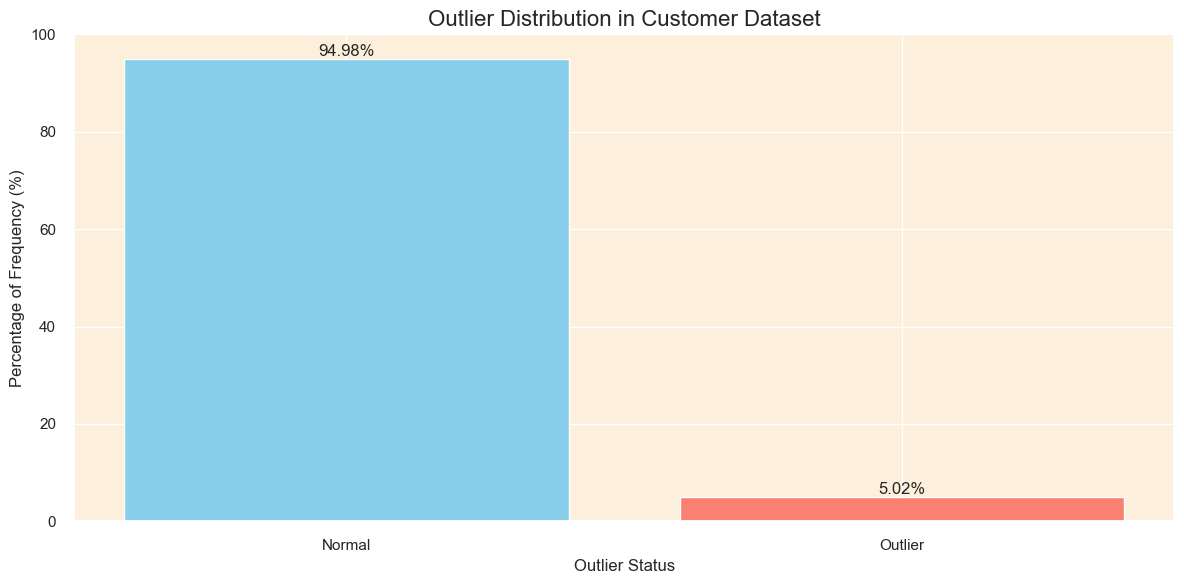

In [186]:
# Calculate the percentage of outliers in the dataset
outlier_counts = customer_data['Is_Outliers'].value_counts().reset_index()
outlier_counts.columns = ['Outlier_Status', 'Count']
outlier_counts['Percentage'] = (outlier_counts['Count'] / len(customer_data)) * 100

# Plot the outlier distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(x=outlier_counts['Outlier_Status'], height=outlier_counts['Percentage'], color=['skyblue', 'salmon'])

# Title and labels
plt.title("Outlier Distribution in Customer Dataset", fontsize=16)
plt.xlabel("Outlier Status", fontsize=12)
plt.ylabel("Percentage of Frequency (%)", fontsize=12)
plt.xticks([0, 1], labels=['Normal', 'Outlier'])
plt.ylim(0, 100)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


**Inferences:** From the above plot, we can observe that about 5% of the customers have been identified as outliers in our dataset. This percentage seems to be a reasonable proportion, not too high to lose a significant amount of data, and not too low to retain potentially noisy data points. It suggests that our isolation forest algorithm has worked well in identifying a moderate percentage of outliers, which will be critical in refining our customer segmentation.

**Strategy:** Considering the nature of the project, it is crucial to handle these outliers to prevent them from affecting the clusters' quality significantly. Therefore, we will seperate these outliers for further analysis and remove them from our main dataset to prepare it for the clustering analysis.

In [187]:
# Seperate the outlier data points to another dataframe
outlier_data = customer_data[customer_data['Is_Outliers']==1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outliers']==0]

# Drop the Outlier_Scores and Is_Outliers columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outliers'])

# Reset the index
customer_data_cleaned.reset_index(drop=True, inplace=True)

customer_data_cleaned.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0


Now we have successfully cleaned the dataset by dropping the outlier data points that can introduce noise to our customer-centric dataset.

### 7. Data Visualization

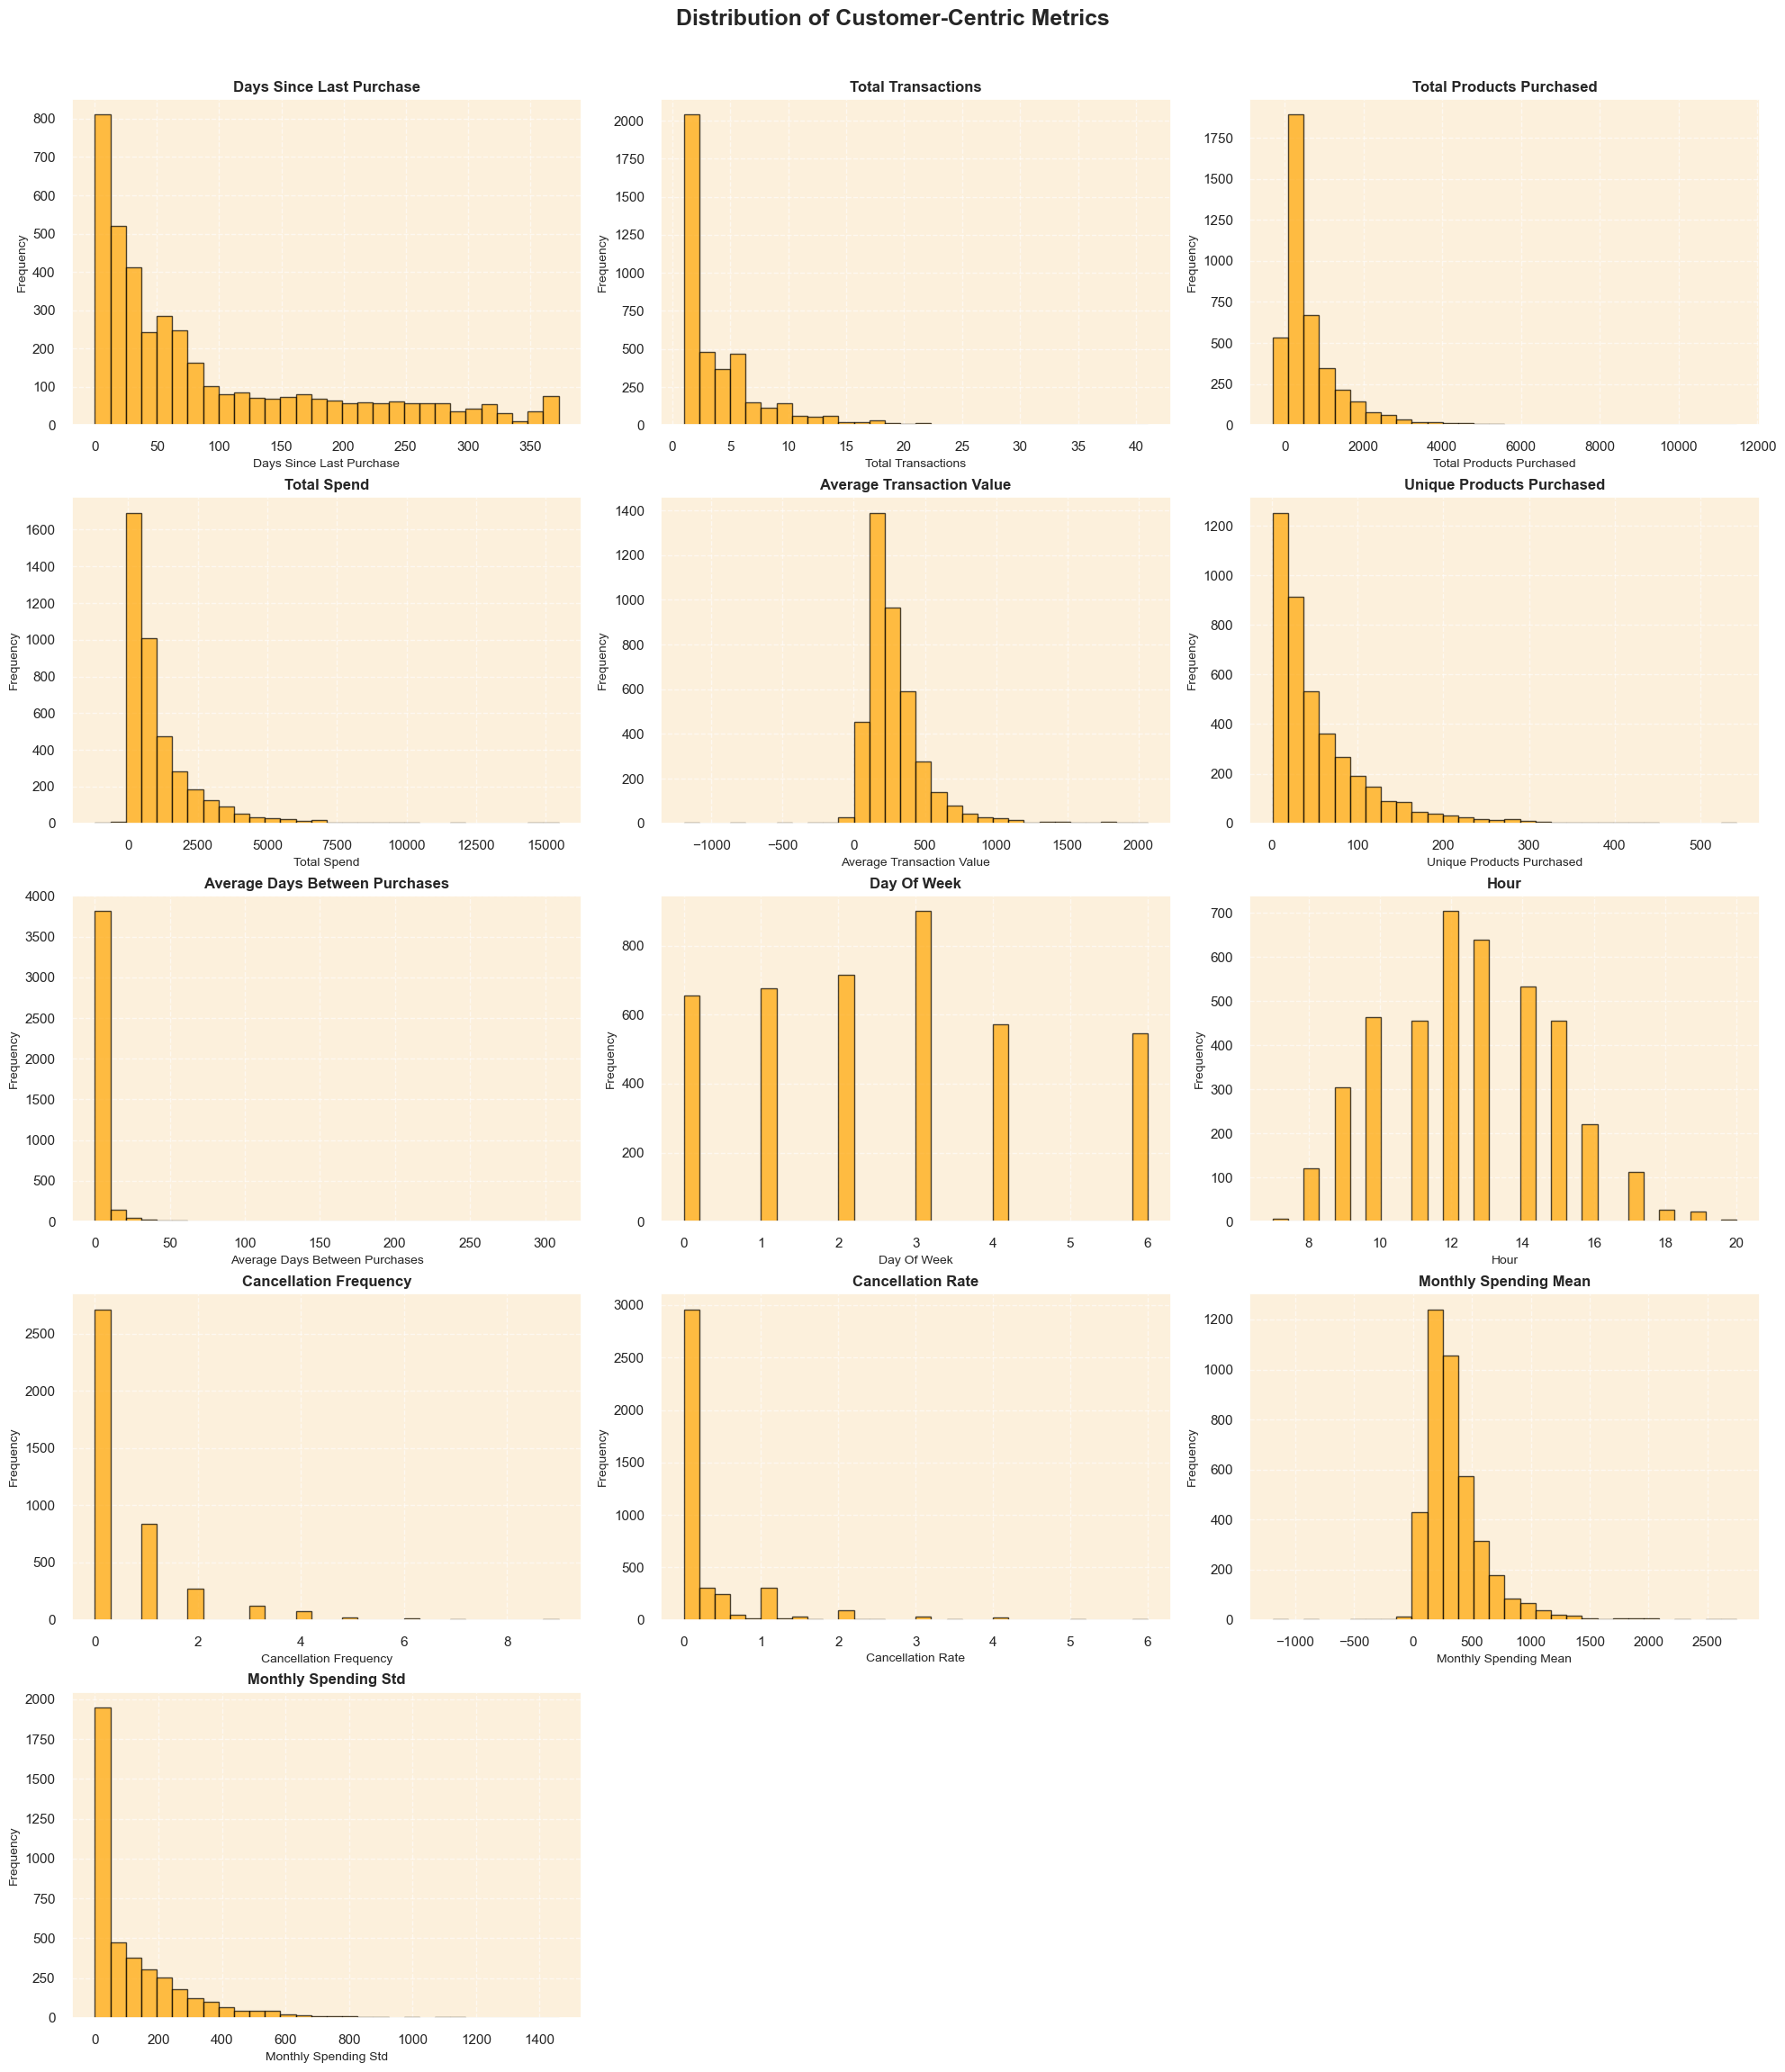

In [188]:
# Define the columns to plot and their respective titles
columns = [
    ('Days_Since_Last_Purchase', "Days Since Last Purchase"),
    ('Total_Transactions', "Total Transactions"),
    ('Total_Products_Purchased', "Total Products Purchased"),
    ('Total_Spend', "Total Spend"),
    ('Average_Transaction_Value', "Average Transaction Value"),
    ('Unique_Products_Purchased', "Unique Products Purchased"),
    ('Average_Days_Between_Purchases', "Average Days Between Purchases"),
    ('Day_Of_Week', "Day Of Week"),
    ('Hour', "Hour"),
    ('Cancellation_Frequency', "Cancellation Frequency"),
    ('Cancellation_Rate', "Cancellation Rate"),
    ('Monthly_Spending_Mean', "Monthly Spending Mean"),
    ('Monthly_Spending_Std', "Monthly Spending Std"),
]

# Calculate rows and columns dynamically based on the number of plots
n_cols = 3  # Fixed number of columns
n_rows = (len(columns) + n_cols - 1) // n_cols  # Dynamically determine rows

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 5))
fig.suptitle("Distribution of Customer-Centric Metrics", fontsize=18, weight='bold', y=0.92)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each column
for i, (col, title) in enumerate(columns):
    ax = axes[i]
    ax.hist(customer_data_cleaned[col], bins=30, color='orange', alpha=0.7, edgecolor='black')
    ax.set_title(title, fontsize=12, weight='bold')
    ax.set_xlabel(col.replace("_", " "), fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)

# Remove unused subplots (if fewer plots than grid spaces)
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust for the main title
plt.show()


In [189]:
customer_data_cleaned['Average_Transaction_Value'].describe()

count        4067.0
mean     285.023887
std      216.428297
min         -1192.2
25%        151.0925
50%         231.605
75%        356.1975
max         2062.06
Name: Average_Transaction_Value, dtype: Float64

### 6. Correlation Analysis

Before we proceed to K-Means clustering, it is important to check the correlation between features in our dataset. The presence of **multi-collinerity**, where features are highly correlated, can pontentially affect the clustering process by not allowing the model to learn the actual underlying patterns in the data, ass the features do not provide unique information. This could lead to clusters that are not well-seperated and meaningful. <br>

If we identify multicollinearity, we can **utilize dimensionality reduction techniques like PCA**. These techniques help in neutralizing the effect of multicollinearity by transforming the correlated features into a new set of uncorrelated variables, preserving most of the original data's variance. This step not only enhances the quality of clusters formed but also makes the clustering process more computationally efficient.

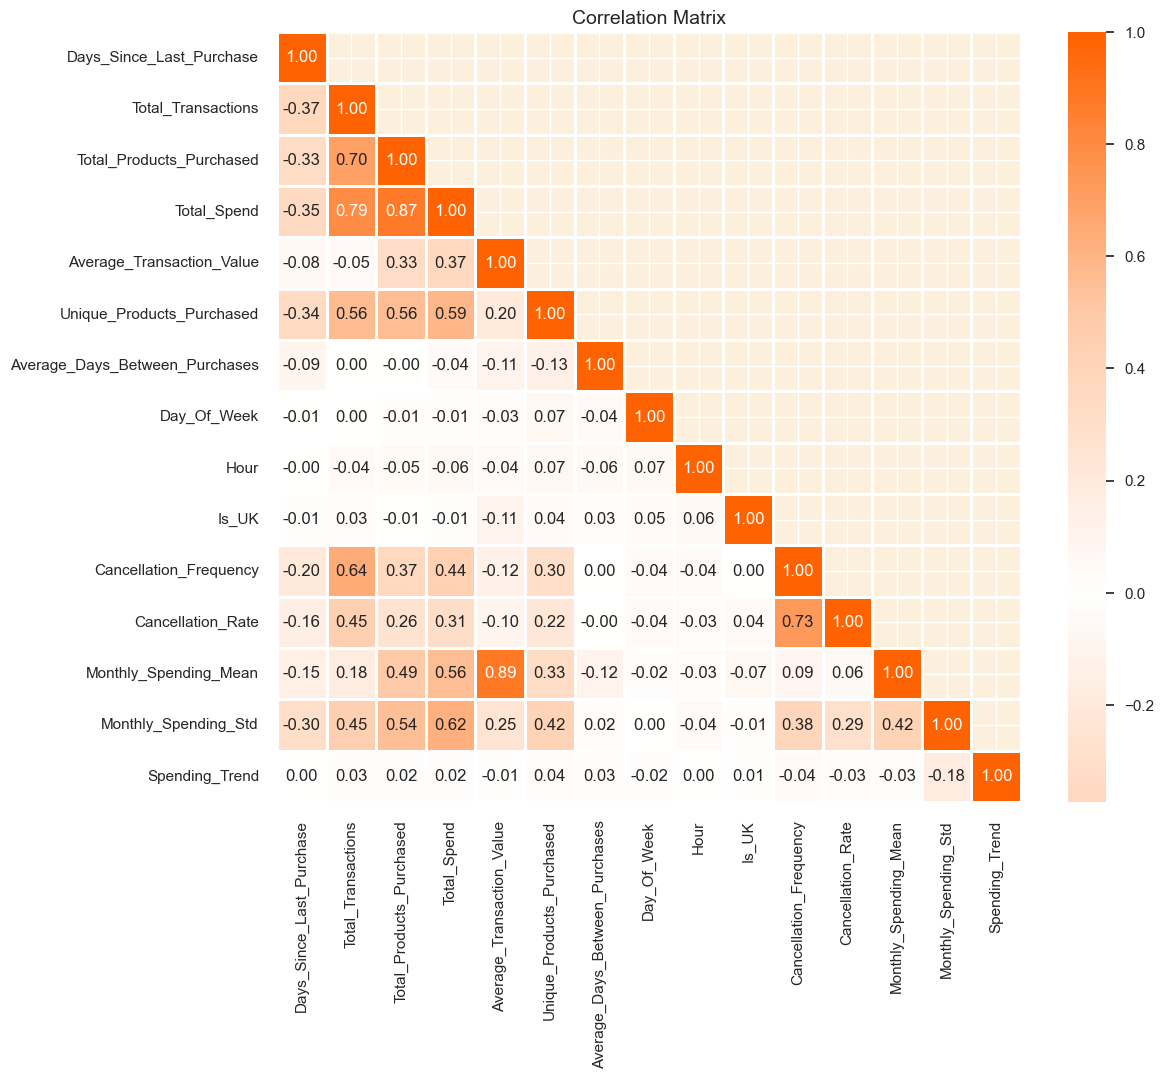

In [190]:
# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

**Inferences:** Looking at the heatmap, we can see that there are some pairs of variables that have high correlations, for instance:

- Monthly_Spending_Mean and Average_Transaction_Value

- Total_Spend and Total_Products_Purchased

- Total_Transactions and Total_Spend

- Cancellation_Rate and Cancellation_Frequency

- Total_Transactions and Total_Products_Purchased

These high correlations indicate that these variables move closely together, implying a degree of multicollinearity

### 7. Feature Scaling

Before we move forward with the clustering and dimensionality reduction, it's imperative to scale our features. This step holds significant importance, especially in the context of distance-based algorithms like K-means and dimensionality reduction methods like PCA. Here's why:

- For K-means Clustering: K-means relies heavily on the concept of 'distance' between data points to form clusters. When features are not on a similar scale, features with larger values can disproportionately influence the clustering outcome, potentially leading to incorrect groupings.

- For PCA: PCA aims to find the directions where the data varies the most. When features are not scaled, those with larger values might dominate these components, not accurately reflecting the underlying patterns in the data.

In [191]:
# Initialize the StandardScaler for Standardization Method
scaler = StandardScaler()

# List of columns that don't need to be scaled 
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying Scaler 
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Disply
customer_data_scaled.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2.345802,-0.477589,-0.754491,-0.813464,-1.317106,-0.908471,-0.310564,1,-1.086929,1,0.420541,0.417623,-1.329018,-0.713318,0.090868
1,12347.0,-0.905575,0.707930,2.005048,2.366920,1.528132,0.815119,-0.128438,1,0.647126,0,-0.545753,-0.432111,0.989511,1.259961,0.116774
2,12348.0,-0.170744,-0.003381,1.863591,0.247087,0.343279,-0.570512,0.672476,3,2.814696,0,-0.545753,-0.432111,0.023997,0.466213,-0.491708
3,12349.0,-0.744516,-0.714692,-0.047205,0.262074,5.418285,0.291283,-0.310564,0,-1.520443,0,-0.545753,-0.432111,4.159521,-0.713318,0.090868
4,12350.0,2.194809,-0.714692,-0.534446,-0.596223,0.043327,-0.655002,-0.310564,2,1.514154,0,-0.545753,-0.432111,-0.220428,-0.713318,0.090868


Now we can proceed to another step which is **Dimensionality Reduction** in order to treat the multi-collinerity of our dataset.

### 8. Dimensionality Reduction

The importances of Dimensionality Reduction:

- Multicollinearity Detected: In the previous steps, we identified that our dataset contains multicollinear features. Dimensionality reduction can help us remove redundant information and alleviate the multicollinearity issue.

- Better Clustering with K-means: Since K-means is a distance-based algorithm, having a large number of features can sometimes dilute the meaningful underlying patterns in the data. By reducing the dimensionality, we can help K-means to find more compact and well-separated clusters.

- Noise Reduction: By focusing only on the most important features, we can potentially remove noise in the data, leading to more accurate and stable clusters.

- Enhanced Visualization: In the context of customer segmentation, being able to visualize customer groups in two or three dimensions can provide intuitive insights. Dimensionality reduction techniques can facilitate this by reducing the data to a few principal components which can be plotted easily.

- Improved Computational Efficiency: Reducing the number of features can speed up the computation time during the modeling process, making our clustering algorithm more efficient.

In this step, we are considering the application of dimensionality reduction techniques to simplify our data while retaining the essential information. Among various methods such as KernelPCA, ICA, ISOMAP, TSNE, and UMAP, I am starting with PCA (Principal Component Analysis). Here's why:

PCA is an excellent starting point because it works well in capturing linear relationships in the data, which is particularly relevant given the multicollinearity we identified in our dataset. It allows us to reduce the number of features in our dataset while still retaining a significant amount of the information, thus making our clustering analysis potentially more accurate and interpretable. Moreover, it is computationally efficient, which means it won't significantly increase the processing time.

However, it's essential to note that we are keeping our options open. After applying PCA, if we find that the first few components do not capture a significant amount of variance, indicating a loss of vital information, we might consider exploring other non-linear methods. These methods can potentially provide a more nuanced approach to dimensionality reduction, capturing complex patterns that PCA might miss, albeit at the cost of increased computational time and complexity.

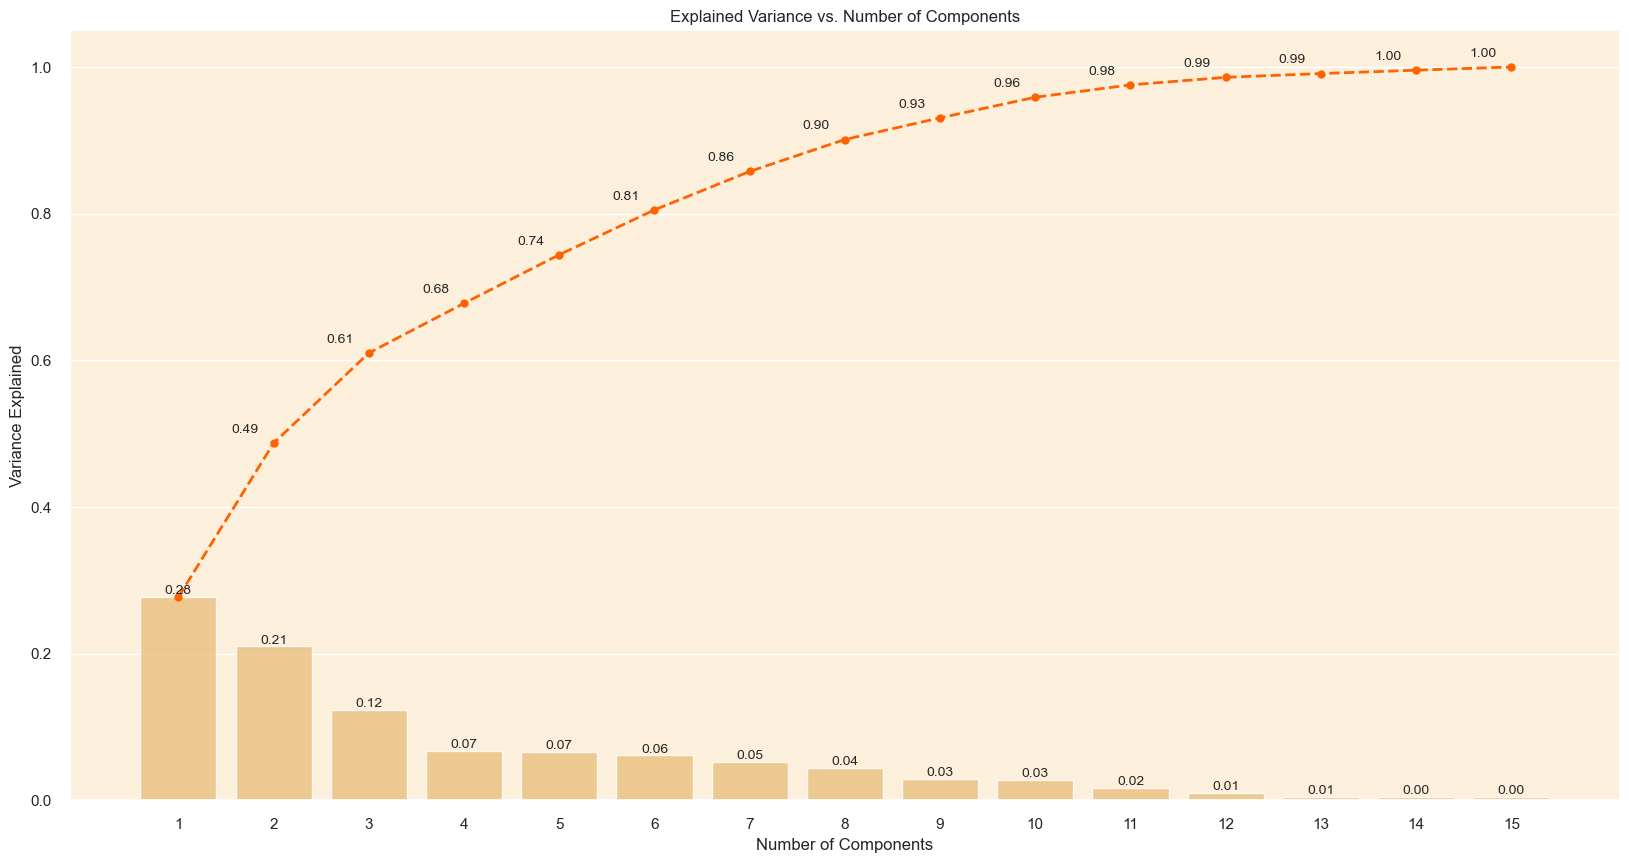

In [192]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cummulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cummulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20,10))

# Fixing the barplot x-axis range
barplot = sns.barplot(x=list(range(1, len(cummulative_explained_variance) + 1)), 
                      y=explained_variance_ratio, color='#fcc36d', alpha=0.8)

# Plot the cumulative variance as a line plot
lineplot = plt.plot(range(0, len(cummulative_explained_variance)), cummulative_explained_variance, 
                    marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Set labels and title
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance vs. Number of Components')

x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cummulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

# Display the plot
plt.show()

**Observations:** The plot and the cumulative explained variance values indicate how much of the total variance in the dataset is captured by each principal component, as well as the cumulative variance explained by the first n components. Here, we can observe that:

- The first component explains approximately 28% of the variance.

- The first two components together explain about 49% of the variance.

- The first three components explain approximately 61% of the variance, and so on.

To choose the optimal number of components, we generally look for a point where adding another component doesn't significantly increase the cumulative explained variance, often referred to as the "elbow point" in the curve.

From the plot, we can see that the increase in cumulative variance starts to slow down after the 6th component (which captures about 81% of the total variance).

Considering the context of customer segmentation, we want to retain a sufficient amount of information to identify distinct customer groups effectively. Therefore, retaining the first 6 components might be a balanced choice, as they together explain a substantial portion of the total variance while reducing the dimensionality of the dataset.

In [193]:
# Creating PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe 
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC' + str(i + 1) for i in range(pca.n_components_)])

customer_data_pca.index = customer_data_scaled.index

customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-2.186469,-1.705370,-1.576745,1.008187,-0.411803,-1.658012
12347.0,3.290264,-1.387375,1.923310,-0.930990,-0.010591,0.873150
12348.0,0.584684,0.585019,0.664727,-0.655411,-0.470280,2.306657
12349.0,1.791116,-2.695652,5.850040,0.853418,0.677111,-1.520098
12350.0,-1.997139,-0.542639,0.578781,0.183682,-1.484838,0.062672


In [194]:
# Define a function to highlight the top 3 absolute vallues in each column of dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component dataframe and apply the highlight
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)], 
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Days_Since_Last_Purchase,-0.217859,-0.013986,0.067660,0.273430,-0.240968,-0.373059
Total_Transactions,0.380301,0.014759,-0.259180,-0.138165,-0.017356,-0.028257
Total_Products_Purchased,0.401425,0.007365,0.069133,-0.134806,0.057476,-0.013373
Total_Spend,0.431260,0.010159,0.065165,-0.092047,0.025202,-0.036947
Average_Transaction_Value,0.176225,-0.015544,0.589050,0.114307,0.021847,-0.101738
Unique_Products_Purchased,0.324992,0.063346,0.014010,-0.230502,-0.193981,0.124604
Average_Days_Between_Purchases,-0.022600,-0.036007,-0.127341,-0.160627,0.753462,0.211787
Day_Of_Week,-0.026572,0.994650,-0.006591,0.028870,0.058359,-0.060799
Hour,-0.024259,0.056388,-0.002019,-0.226832,-0.528881,0.621915
Is_UK,-0.001014,0.007435,-0.018378,-0.013419,-0.005353,0.014384


**Observations:** <br>

- PC1: Dominated by Total_Spend, Total_Products_Purchased, Total_Transactions. Likely represents Overall Purchasing Activity.
- PC2: Strongly influenced by Day_Of_Week. This might represent Time of Purchase Behavior.
- PC3: Strong contribution from Average_Transaction_Value. Could indicate Purchase Value Patterns.
- PC4: Driven by Spending_Trend and Cancellation_Rate. This might capture Churn Risk or Spending Behavior.
- PC5: Influenced by Average_Days_Between_Purchases. Likely represents Purchase Frequency.
- PC6: Related to Hour and Days_Since_Last_Purchase. This could represent Temporal Purchase Trends.

### 9. Model Development: K-Means Clustering

To ascertain the optimal number of clustes (k) for segmenting customers, We will explore two renowned methods: <br>

- **Elbow Method**
- **Silhouette Method**

**Elbow Method:** The Elbow Method is a technique for identifying the ideal number of clusters in a dataset. It involves iterating through the data, generating clusters for various values of k. The k-means algorithm calculates the sum of squared distances between each data point and its assigned cluster centroid, known as the inertia or WCSS score. By plotting the inertia score against the k value, we create a graph that typically exhibits an elbow shape, hence the name "Elbow Method". The elbow point represents the k-value where the reduction in inertia achieved by increasing k becomes negligible, indicating the optimal stopping point for the number of clusters.

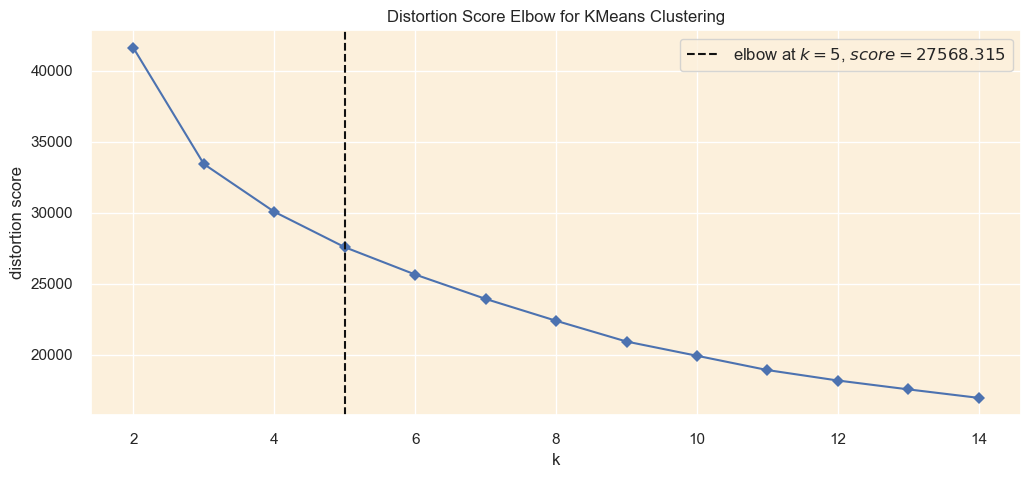

In [195]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor':'#fcf0dc'})

# Instatiate the clustering model with the specified parameters
kmeans = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12,5))

# Instantiate the KElbowVisualizer with the model and range of k value
visualizer = KElbowVisualizer(kmeans, k=(2,15), timings=False, ax=ax)

# Fit the data 
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show()

plt.show()

**Optimal k Value: Elbow Method Insights** <br>

The optimal value of k for the KMeans clustering algorithm can be found at the elbow point. Using the YellowBrick library for the Elbow method, we observe that the suggested optimal k value is 5. However, we don't have a very distinct elbow point in this case, which is common in real-world data. From the plot, we can see that the inertia continues to decrease significantly up to k=5, indicating that the optimum value of k could be between 3 and 7. To choose the best k within this range, we can employ the silhouette analysis, another cluster quality evaluation method. Additionally, incorporating business insights can help determine a practical k value.

**Silhouette Method**: The Silhouette Method is an approach to find the optimal number of clusters in a dataset by evaluating the consistency within clusters and their separation from other clusters. It computes the silhouette coefficient for each data point, which measures how similar a point is to its own cluster compared to other clusters.

In [196]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))
             

    # Second plot (subplot): Silhouette plots for each k value

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

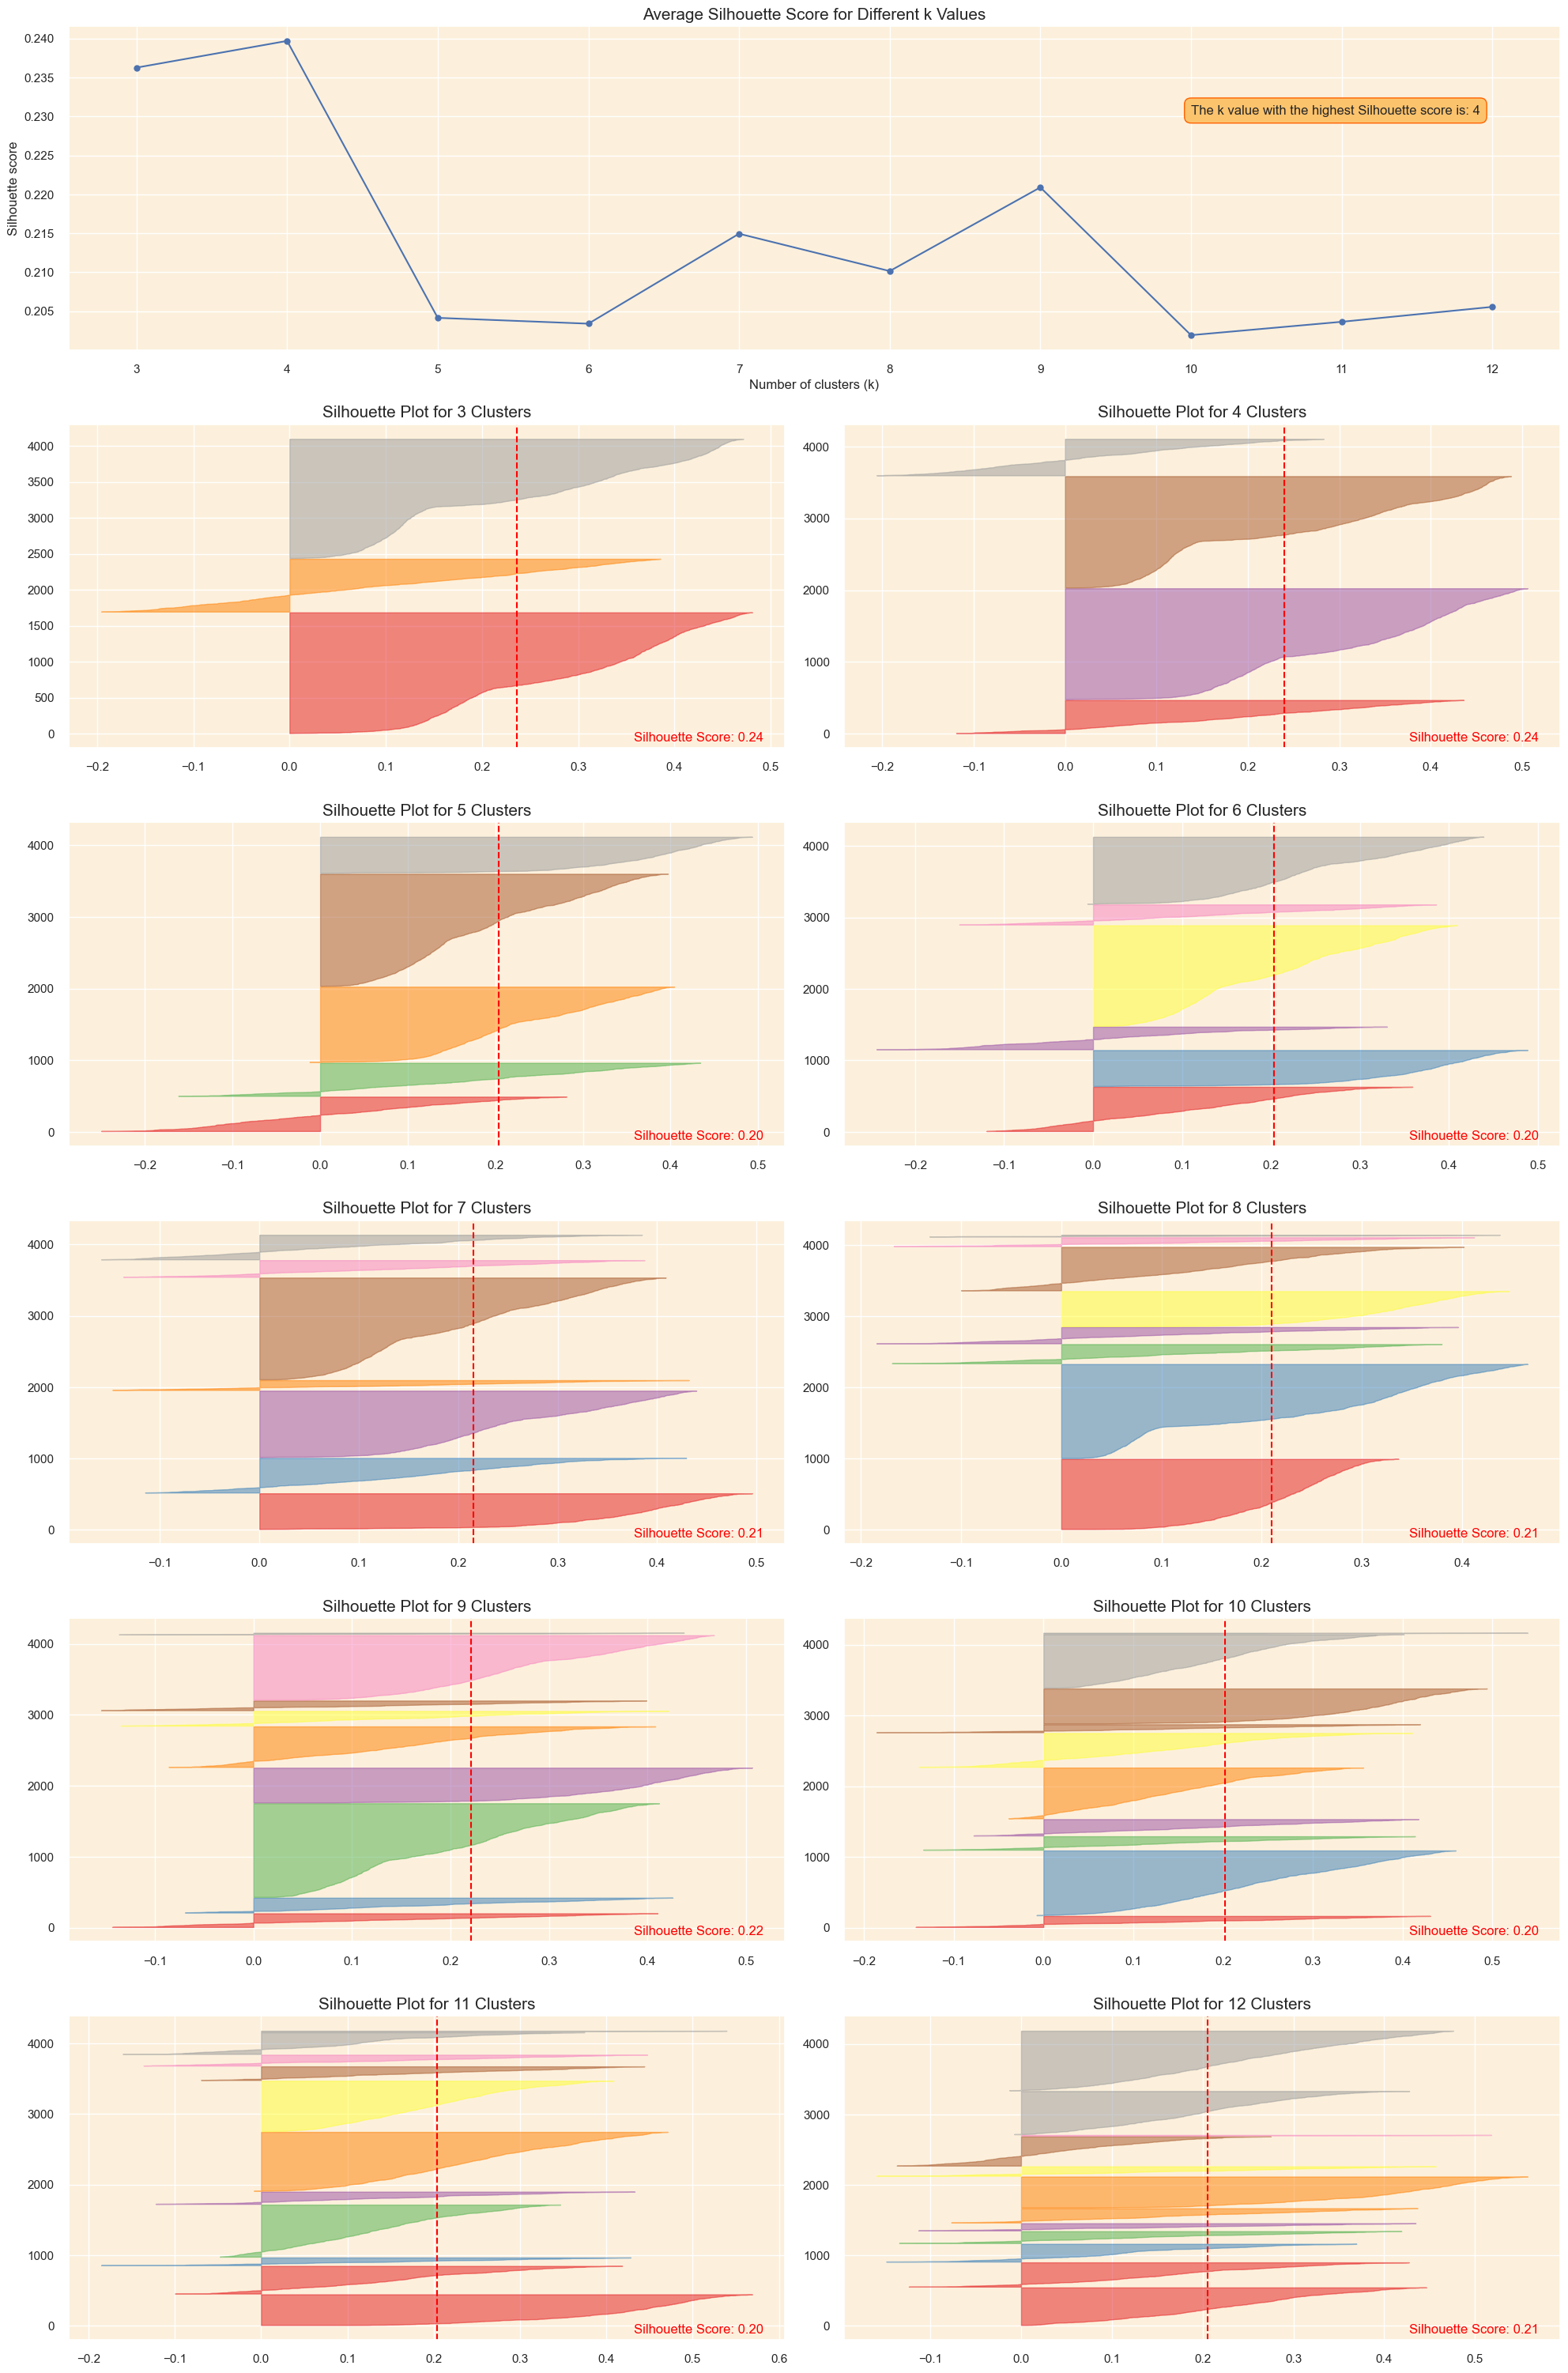

In [197]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

**Optimal k Value: Silhouette Method Insights** <br>

Based on above guidelines and after carefully considering the silhouette plots, it's clear that choosing ( k = 3 ) is the better option. This choice gives us clusters that are more evenly matched and well-defined, making our clustering solution stronger and more reliable.

**K-Means Clustering Model** <br>

In this step, I am going to apply the K-means clustering algorithm to segment customers into different clusters based on their purchasing behaviors and other characteristics, using the optimal number of clusters determined in the previous step.

It's important to note that the K-means algorithm might assign different labels to the clusters in each run. To address this, we have taken an additional step to swap the labels based on the frequency of samples in each cluster, ensuring a consistent label assignment across different runs.

In [198]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old lables to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per criteria
label_mapping = {v: k for k, v in {2:1, 1:0, 0:2}.items()}

# Apply the mapping to get new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster to dataset
customer_data_cleaned['cluster'] = new_labels
customer_data_pca['cluster'] = new_labels

In [199]:
customer_data_cleaned.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,2
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,0
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,1
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,1


### 10. Clustering Model Evaluation

In [200]:
# Setting up the color scheme for the clusters
colors = ['#e8000b', '#1ac938', '#023eff']

# Create seperate dataframe for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster']==0]
cluster_1 = customer_data_pca[customer_data_pca['cluster']==1]
cluster_2 = customer_data_pca[customer_data_pca['cluster']==2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster seperately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

**Check for Cluster Distribution**

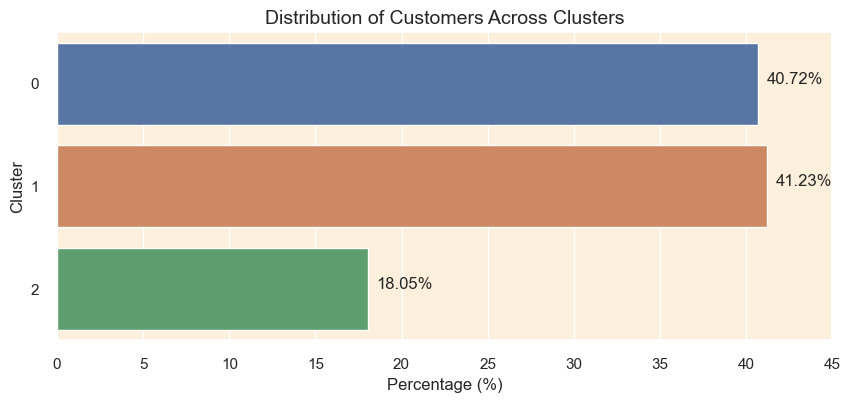

In [201]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace = True)

# Create bar plot
plt.figure(figsize=(10,4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h')

# Adding percentage on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')
    
plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

The distribution of customers across the clusters, as depicted by the bar plot, suggests a fairly balanced distribution with clusters 0 and 1 holding around 41% of customers each and cluster 2 accommodating approximately 18% of the customers.

This balanced distribution indicates that our clustering process has been largely successful in identifying meaningful patterns within the data, rather than merely grouping noise or outliers. It implies that each cluster represents a substantial and distinct segment of the customer base, thereby offering valuable insights for future business strategies.

Moreover, the fact that no cluster contains a very small percentage of customers, assures us that each cluster is significant and not just representing outliers or noise in the data. This setup allows for a more nuanced understanding and analysis of different customer segments, facilitating effective and informed decision-making.

**Evaluation Metrics**
To further scrutinize the quality of our clustering, I will employ the following metrics:

- Silhouette Score: A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.

- Calinski Harabasz Score: This score is used to evaluate the dispersion between and within clusters. A higher score indicates better defined clusters.

- Davies Bouldin Score: It assesses the average similarity between each cluster and its most similar cluster. Lower values indicate better cluster separation.

In [202]:
# Compute number of customers
num_observations = len(customer_data_pca)

# Seperate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = {
    "Number of Observations": [num_observations],
    "Silhouette Score": [sil_score],
    "Calinski Harabasz Score": [calinski_score],
    "Davies Bouldin Score": [davies_score],
}
metrics_df = pd.DataFrame(table_data)

metrics_df

,Number of Observations,Silhouette Score,Calinski Harabasz Score,Davies Bouldin Score
0,4067,0.236271,1257.179496,1.368406


**Clustering Quality Inference**
- The Silhouette Score of approximately 0.236, although not close to 1, still indicates a fair amount of separation between the clusters. It suggests that the clusters are somewhat distinct, but there might be slight overlaps between them. Generally, a score closer to 1 would be ideal, indicating more distinct and well-separated clusters.

- The Calinski Harabasz Score is 1257.17, which is considerably high, indicating that the clusters are well-defined. A higher score in this metric generally signals better cluster definitions, thus implying that our clustering has managed to find substantial structure in the data.

- The Davies Bouldin Score of 1.37 is a reasonable score, indicating a moderate level of similarity between each cluster and its most similar one. A lower score is generally better as it indicates less similarity between clusters, and thus, our score here suggests a decent separation between the clusters.

In conclusion, the metrics suggest that the clustering is of good quality, with clusters being well-defined and fairly separated. However, there might still be room for further optimization to enhance cluster separation and definition, potentially by trying other clustering and dimensionality reduction algorithms.

### 11. Cluster Analysis and Profiling

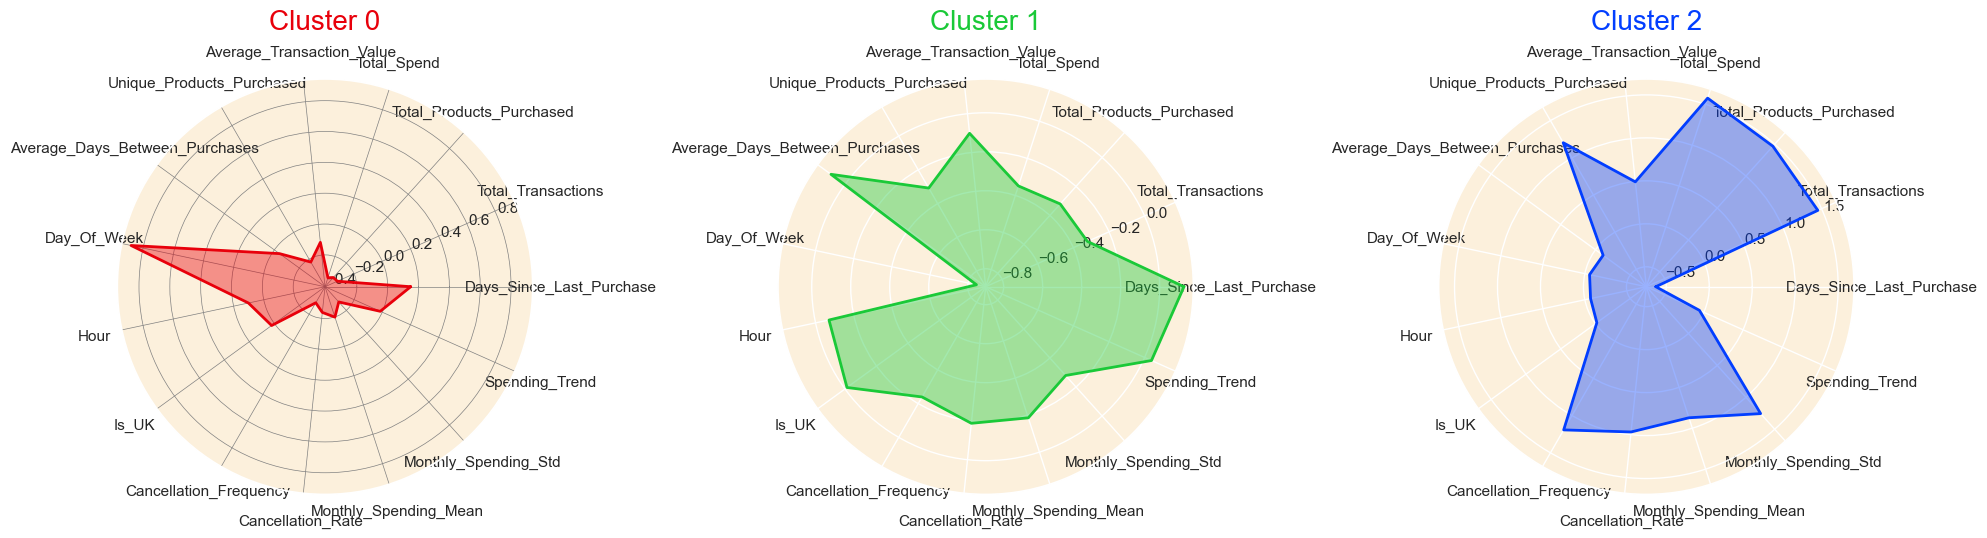

In [203]:
# Setting CustomerID columns as index and assigning it to new dataframe
df_customer = customer_data_cleaned.set_index('CustomerID')

# Standardize the data 
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chaart
def create_radar_chart(ax, angles, data, color, cluster):
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add title 
    ax.set_title(f"Cluster {cluster}", size=20, color=color, y=1.1)
    
# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to complete the loop and append
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20,10), subplot_kw = dict(polar=True), nrows=1, ncols=3)

# Create the radar chart for each cluster 
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

**Customer Profiles Derived from Radar Chart Analysis** <br>

**Cluster 0 (Red Chart):**
Profile: Sporadic Shoppers with a Preference for Weekend Shopping

- Customers in this cluster tend to spend less, with a lower number of transactions and products purchased.
They have a slight tendency to shop during the weekends, as indicated by the very high Day_of_Week value.
Their spending trend is relatively stable but on the lower side, and they have a low monthly spending variation (low Monthly_Spending_Std).
These customers have not engaged in many cancellations, showing a low cancellation frequency and rate.
The average transaction value is on the lower side, indicating that when they do shop, they tend to spend less per transaction. <br>

**Cluster 1 (Green Chart):**
Profile: Infrequent Big Spenders with a High Spending Trend

- Customers in this cluster show a moderate level of spending, but their transactions are not very frequent, as indicated by the high Days_Since_Last_Purchase and Average_Days_Between_Purchases.
They have a very high spending trend, indicating that their spending has been increasing over time.
These customers prefer shopping late in the day, as indicated by the high Hour value, and they mainly reside in the UK.
They have a tendency to cancel a moderate number of transactions, with a medium cancellation frequency and rate.
Their average transaction value is relatively high, meaning that when they shop, they tend to make substantial purchases. <br>

**Cluster 2 (Blue Chart):**
Profile: Frequent High-Spenders with a High Rate of Cancellations

- Customers in this cluster are high spenders with a very high total spend, and they purchase a wide variety of unique products.
They engage in frequent transactions, but also have a high cancellation frequency and rate.
These customers have a very low average time between purchases, and they tend to shop early in the day (low Hour value).
Their monthly spending shows high variability, indicating that their spending patterns might be less predictable compared to other clusters.
Despite their high spending, they show a low spending trend, suggesting that their high spending levels might be decreasing over time.

**Histogram Chart Approach**

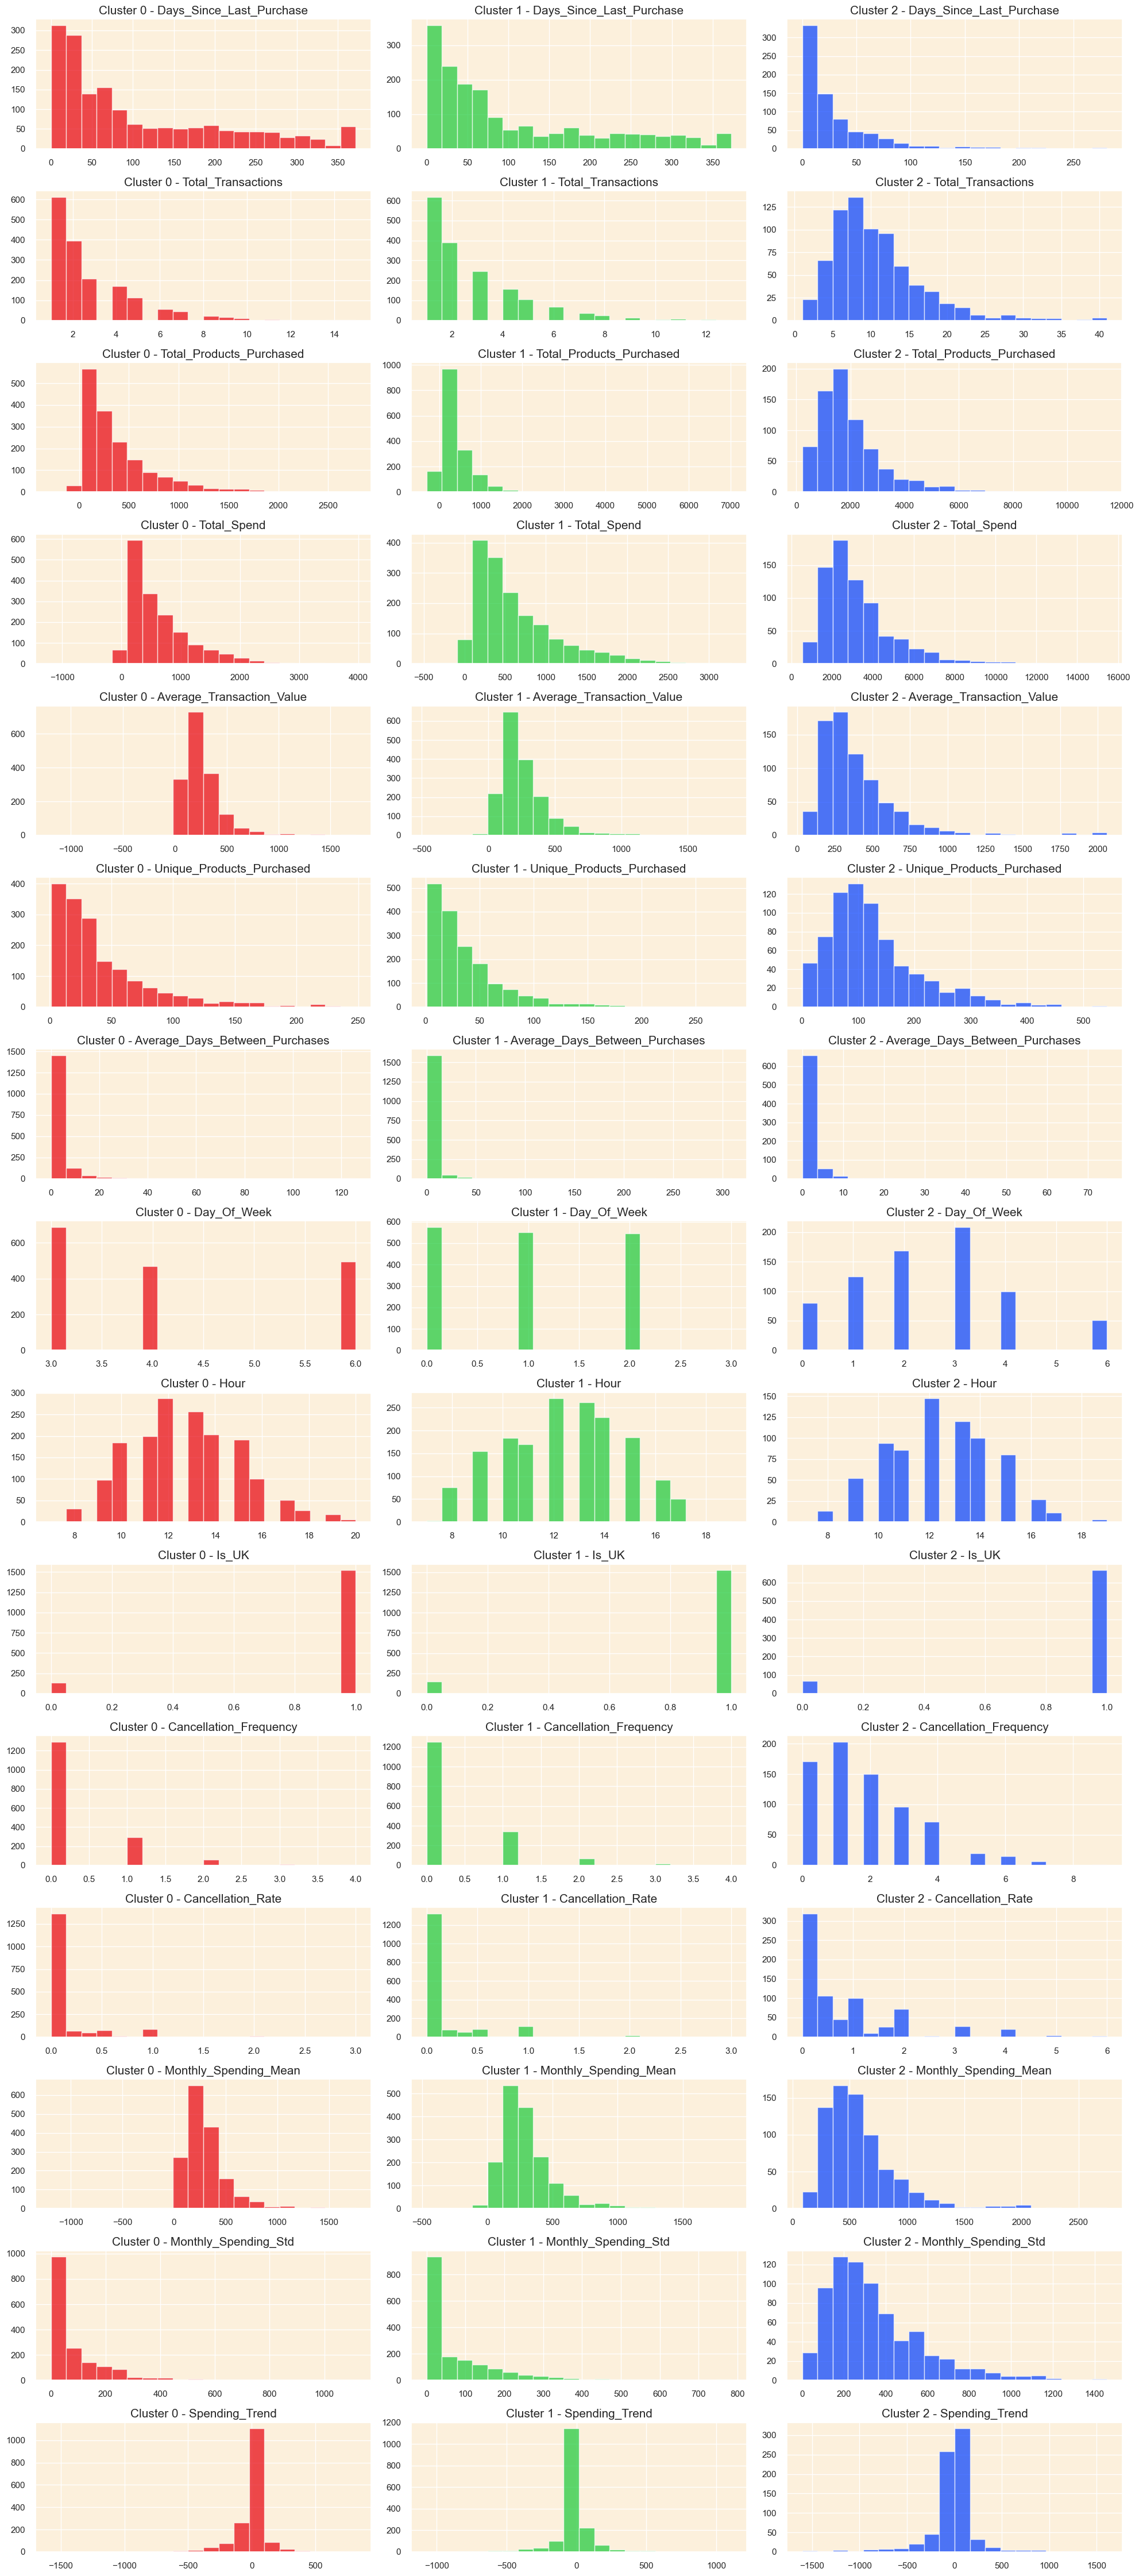

In [204]:
# Plot histogram for each feature segmented by the clusters 
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
nrows = len(features)
ncols = len(clusters)
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 3 * nrows))

for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

The detailed insights from the histograms provide a more nuanced understanding of each cluster, helping in refining the profiles to represent the customer behaviors more accurately. Based on the detailed analysis from both the radar charts and the histograms, here are the refined profiles and titles for each cluster:

**Cluster 0 - Casual Weekend Shoppers**
- Customers in this cluster usually shop less frequently and spend less money compared to other clusters.
- They generally have a smaller number of transactions and buy fewer products.
- These customers prefer shopping during the weekends, possibly engaging in casual or window shopping.
- Their spending habits are quite stable over time, showing little fluctuation in their monthly spending.
- They rarely cancel their transactions, indicating more decisive shopping behavior.
- When they do shop, their spending per transaction tends to be lower compared to other clusters. <br>

**Cluster 1 - Occasional Big Spenders**
- Customers in this cluster don’t shop frequently but tend to spend a considerable amount when they do, buying a variety of products.
- Their spending has been on the rise, indicating a growing interest or investment in their purchases.
- They prefer to shop later in the day, possibly after work hours, and are mainly based in the UK.
- They have a moderate tendency to cancel transactions, which might be due to their higher spending; they perhaps reconsider their purchases more often.
- Their purchases are generally substantial, indicating a preference for quality or premium products. <br>

 **Cluster 2 - Eager Early-Bird Shoppers**
- Customers in this cluster are characterized by their high spending habits. They tend to buy a wide array of unique products and engage in numerous transactions.
- Despite their high expenditure, they have a tendency to cancel a significant portion of their transactions, possibly indicating impulsive buying behaviors.
- They usually shop during the early hours of the day, perhaps finding time before their daily commitments or taking advantage of early bird deals.
- Their spending patterns are quite variable, with high fluctuations in their monthly spending, indicating a less predictable shopping pattern.
- Interestingly, their spending trend is showing a slight decrease, which might signal a future change in their shopping habits.

### 12. Recommendation System

In the final phase of this project, we set to develop a recommendation system to enhance the online shopping experience. This system will suggest products to customers based on the purchasing patterns prevalent in their respective clusters. Earlier in the project, during the customer data preparation stage, we isolated a small fraction (5%) of the customers identified as outliers and reserved them in a separate dataset called outliers_data.

Now, focusing on the core 95% of the customer group, I analyze the cleansed customer data to pinpoint the top-selling products within each cluster. Leveraging this information, the system will craft personalized recommendations, suggesting the top three products popular within their cluster that they have not yet purchased. This not only facilitates targeted marketing strategies but also enriches the personal shopping experience, potentially boosting sales. For the outlier group, a basic approach could be to recommend random products, as a starting point to engage them.

In [205]:
# Step 1: Extract the CustomerIDs of the outliers and remove their transactions from the main dataframe
outlier_customer_ids = outlier_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

# Step 2: Ensure consistent data type for CustomerID across both dataframes before merging
customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

# Step 3: Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

# Step 4: Identify the top 10 best-selling products in each cluster based on the total quantity sold
best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)

# Step 5: Create a record of products purchased by each customer in each cluster
customer_purchases = merged_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()

# Step 6: Generate recommendations for each customer in each cluster
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']
    
    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) & 
                                                         (customer_purchases['cluster'] == cluster)]['StockCode'].tolist()
        
        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        
        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

# Step 7: Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')

In [206]:
# Display 10 random rows from the customer_data_with_recommendations dataframe
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)

,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
CustomerID,,,,,,
15746.0,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN,85123A,WHITE HANGING HEART T-LIGHT HOLDER
15728.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
17459.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
17415.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
15339.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
14335.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
15367.0,22616,PACK OF 12 LONDON TISSUES,84879,ASSORTED COLOUR BIRD ORNAMENT,16014,SMALL CHINESE STYLE SCISSOR
17604.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
17828.0,22616,PACK OF 12 LONDON TISSUES,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,85099B,JUMBO BAG RED RETROSPOT
